# Video Games Sales Prediction

In [193]:
import pandas as pd
import seaborn as sns
import numpy as np

import sklearn

from matplotlib import pyplot

## Get the Data


We will start by importing the data: 


In [194]:
data_Frame = pd.read_csv("C:\\Users\\ThinkPad\\Desktop\\Video_Games_Sales_as_at_22_Dec_2016.csv")
data_Frame


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [196]:
data_Frame.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)


## Data analysis and visualization

Lets explore the Genre data

In [197]:
data_Frame['Genre'].describe()

count      16717
unique        12
top       Action
freq        3370
Name: Genre, dtype: object

We have 12 unique Genre in the dataset

In [198]:
data_Frame['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

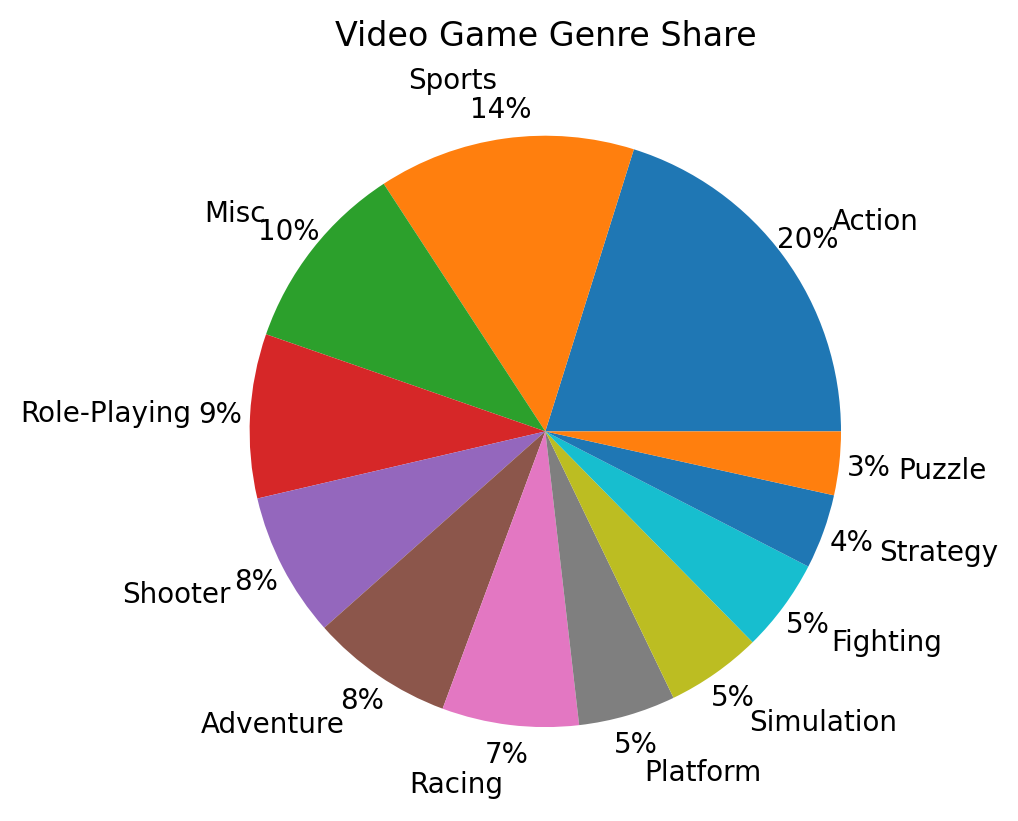

In [199]:
pyplot.pie(data_Frame.Genre.value_counts(), labels=data_Frame.Genre.value_counts().index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
pyplot.title('Video Game Genre Share')
pyplot.ylabel(' ')
pyplot.show()

We can see that Action and Sport are the most common Genre in the dataset


Lets explore the Platforms data

In [200]:
data_Frame['Platform'].describe()

count     16719
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

We have 31 unique values for the Platform

In [201]:
data_Frame['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

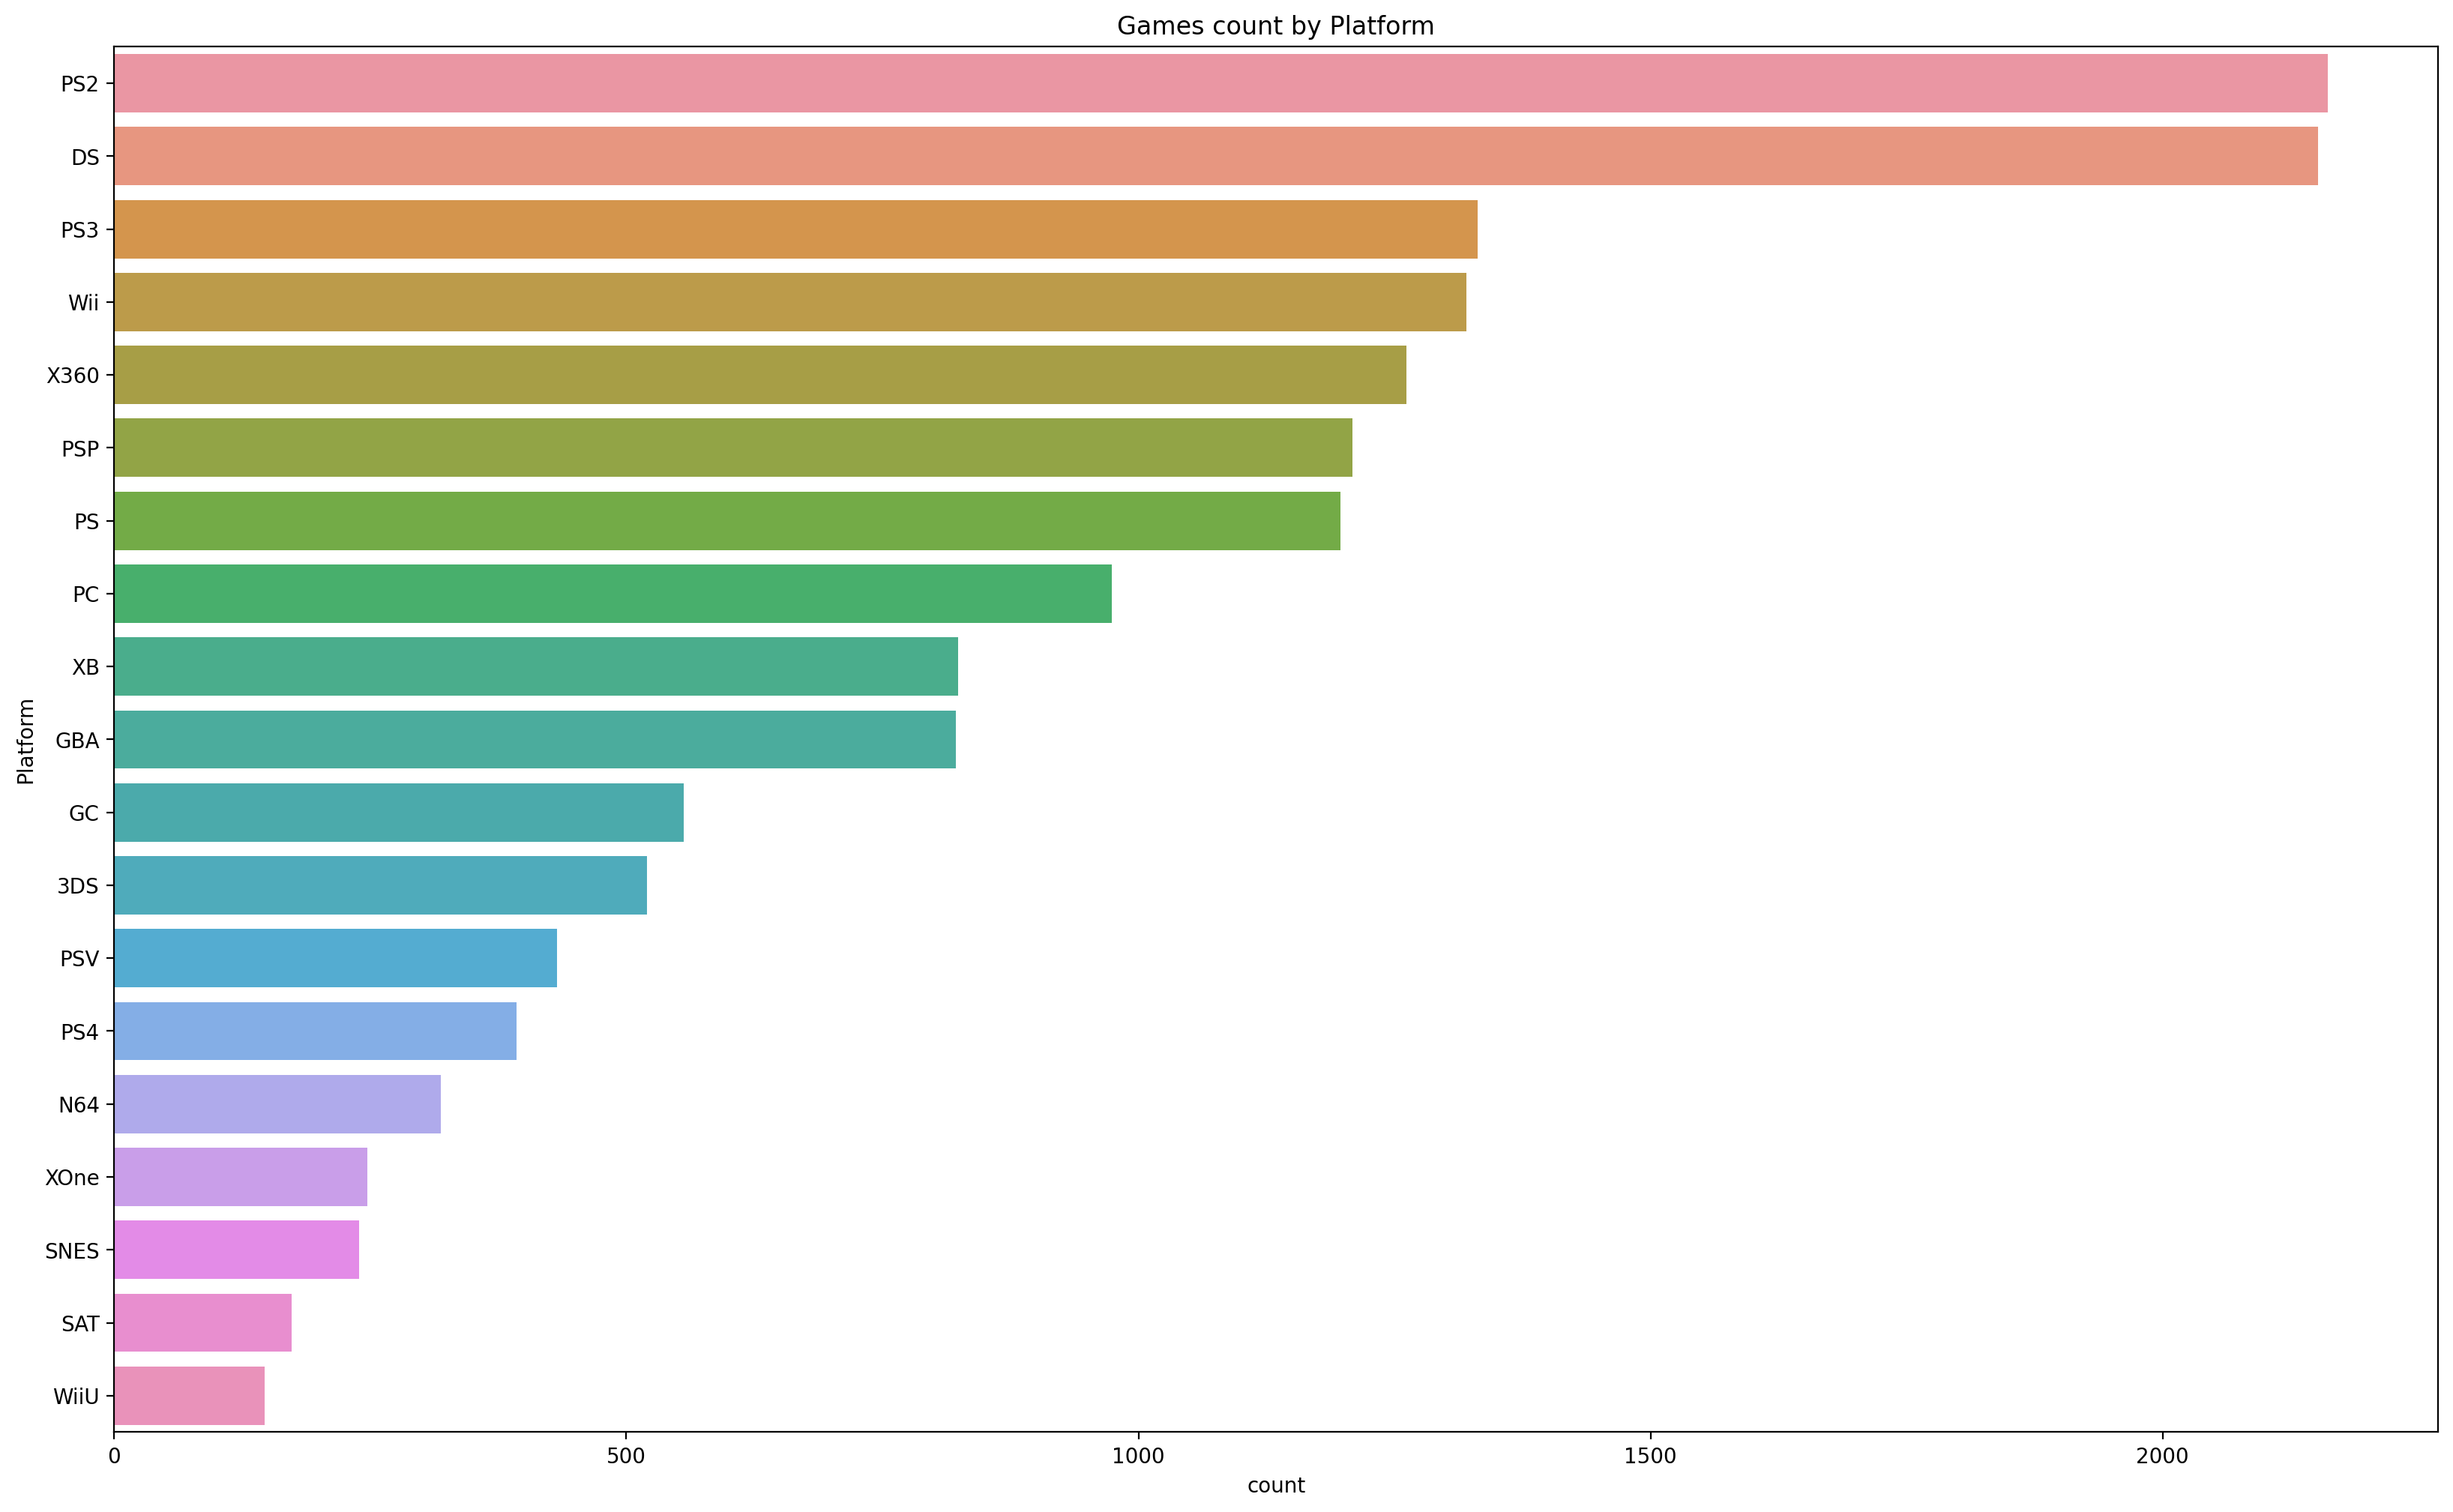

In [202]:
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Platform')
sns.countplot(y='Platform', data=data_Frame, order=data_Frame.Platform.value_counts().iloc[:19].index)
pyplot.show()

We can see that PS2 and DS are the most common platforms in the dataset 


Lets explore the Publisher data

In [203]:
data_Frame['Publisher'].describe()

count               16665
unique                581
top       Electronic Arts
freq                 1356
Name: Publisher, dtype: object

In [204]:
data_Frame['Publisher'].value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64

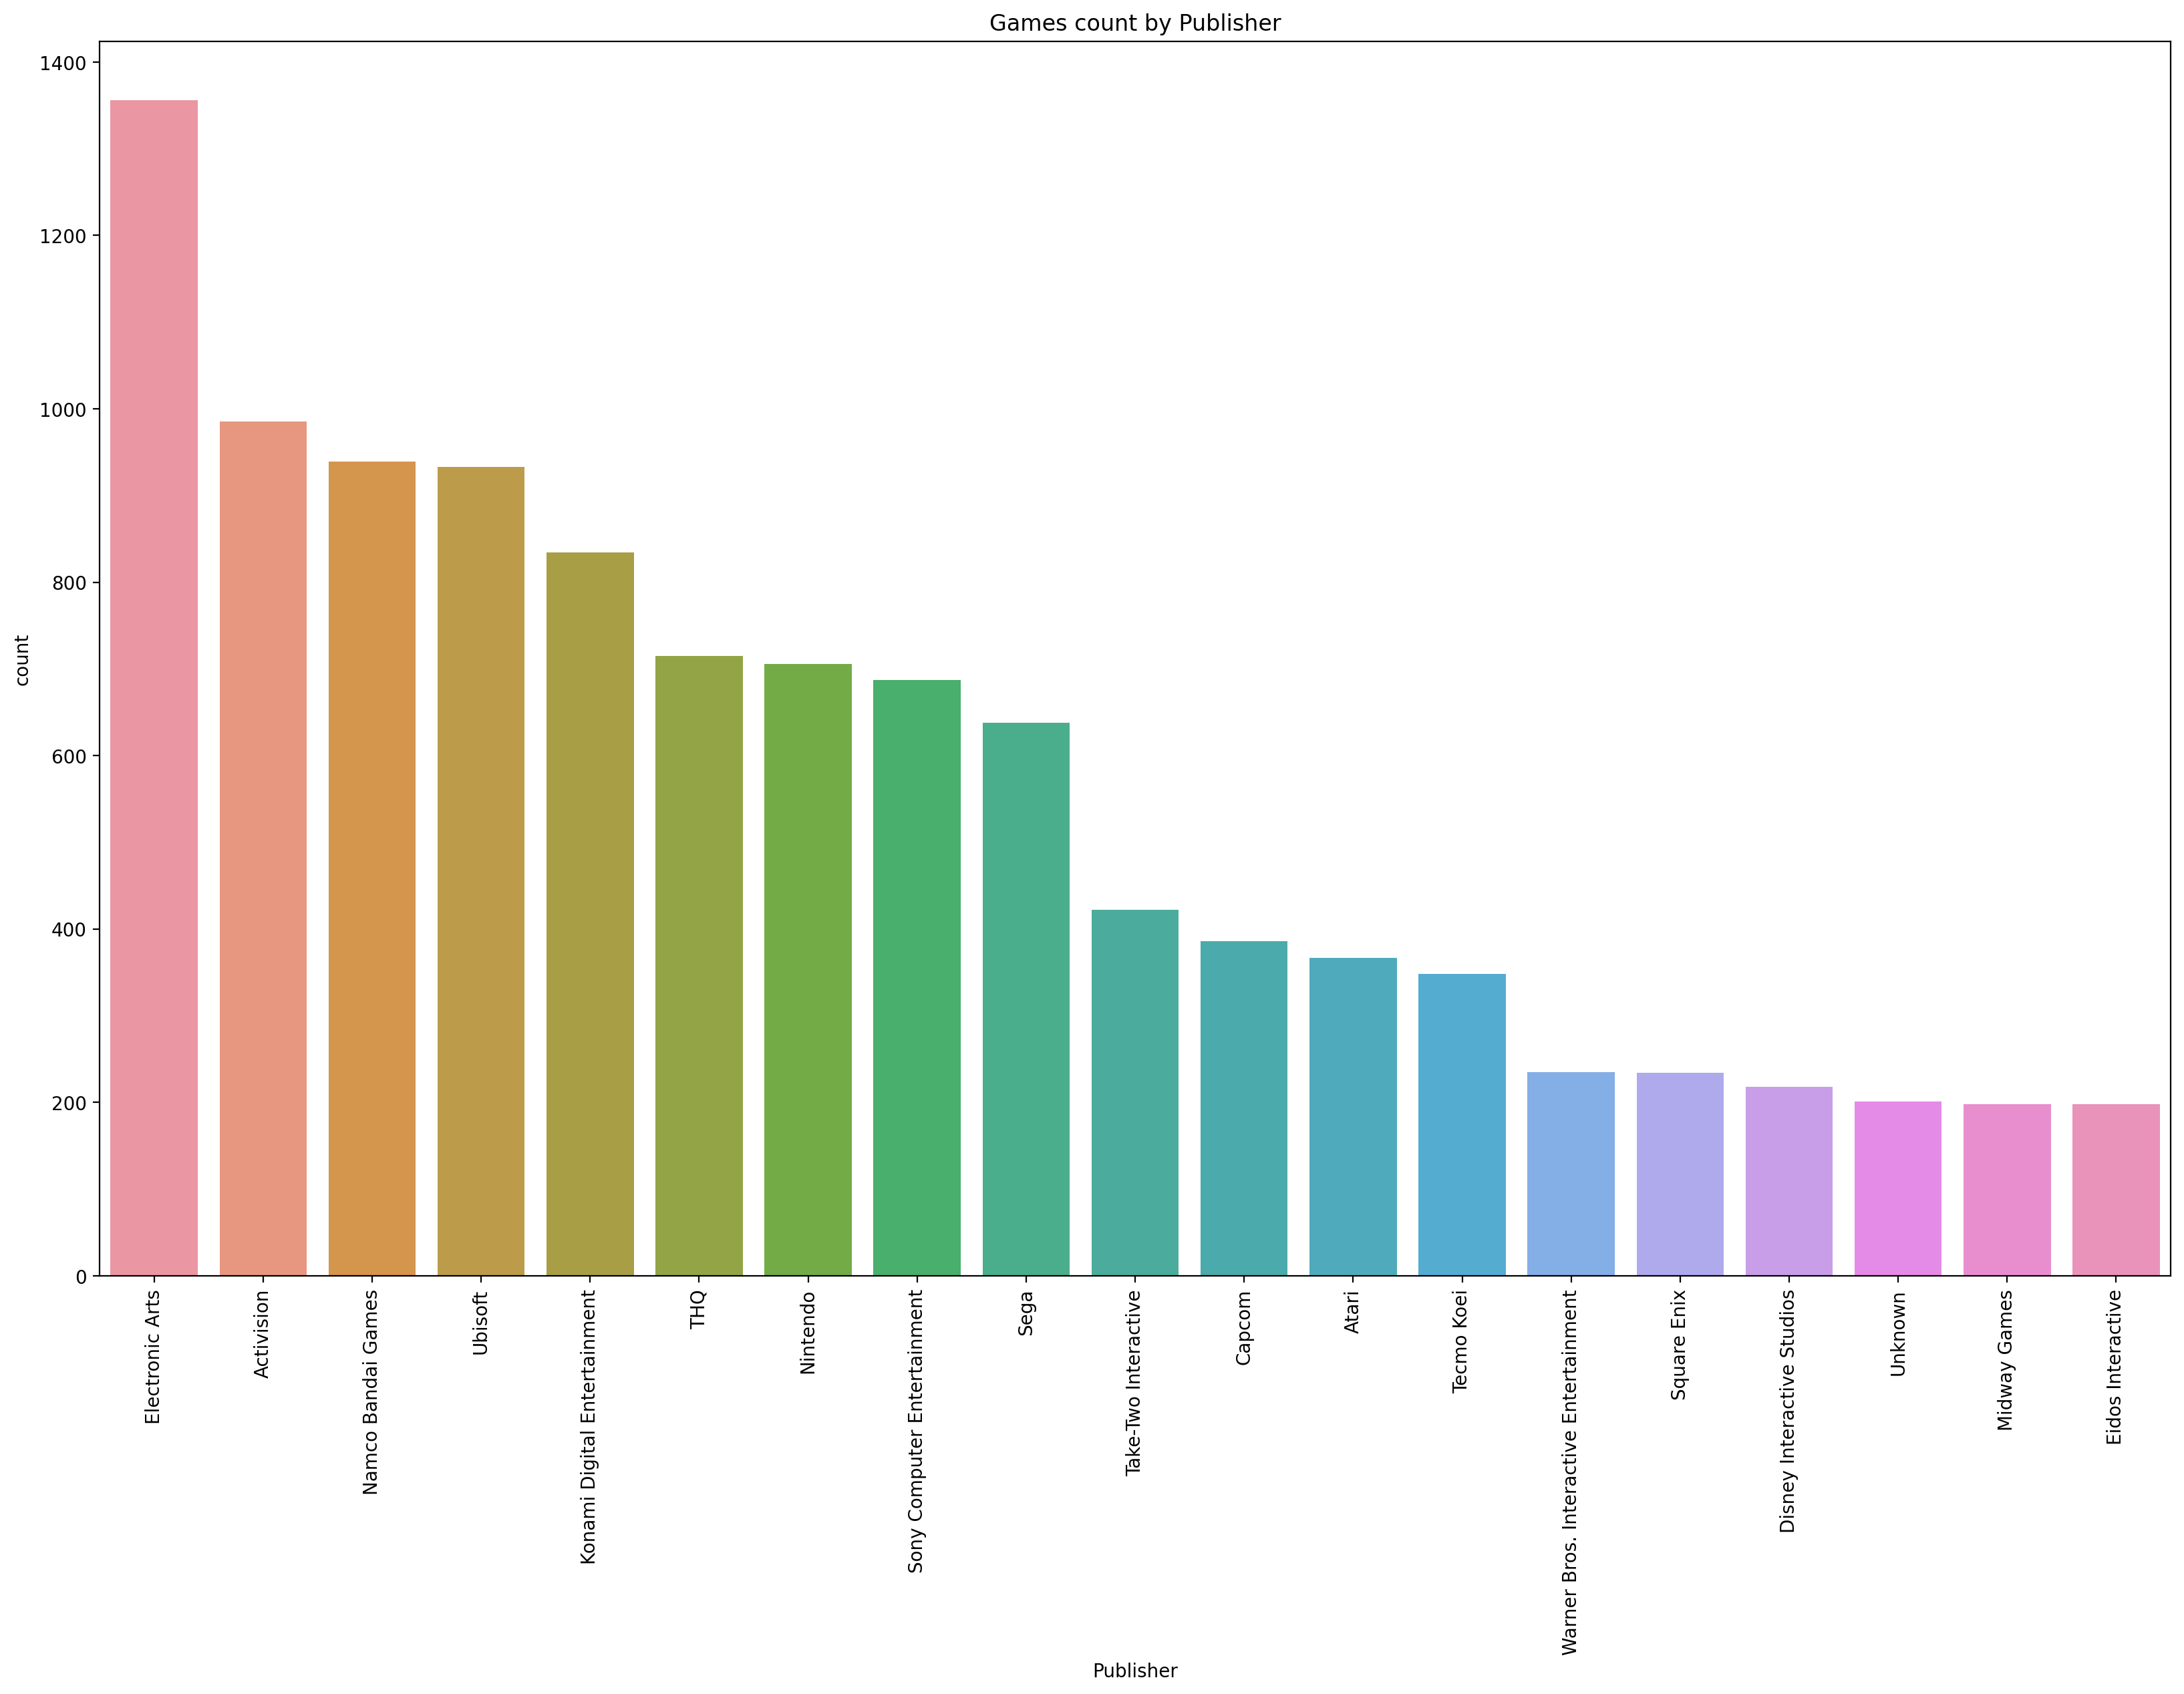

In [205]:
pyplot.figure(figsize = (20,12))
pyplot.title('Games count by Publisher')
sns.countplot(x='Publisher', data=data_Frame, order=data_Frame.Publisher.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

We have 581 unique Publisher categories in the dataset, and Electronic Arts is the most common publisher, The figure above shows the top 20 publishers in the dataset

Lets explore the Critic_Score

In [206]:
data_Frame['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [207]:
data_Frame['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: Critic_Score, Length: 82, dtype: int64

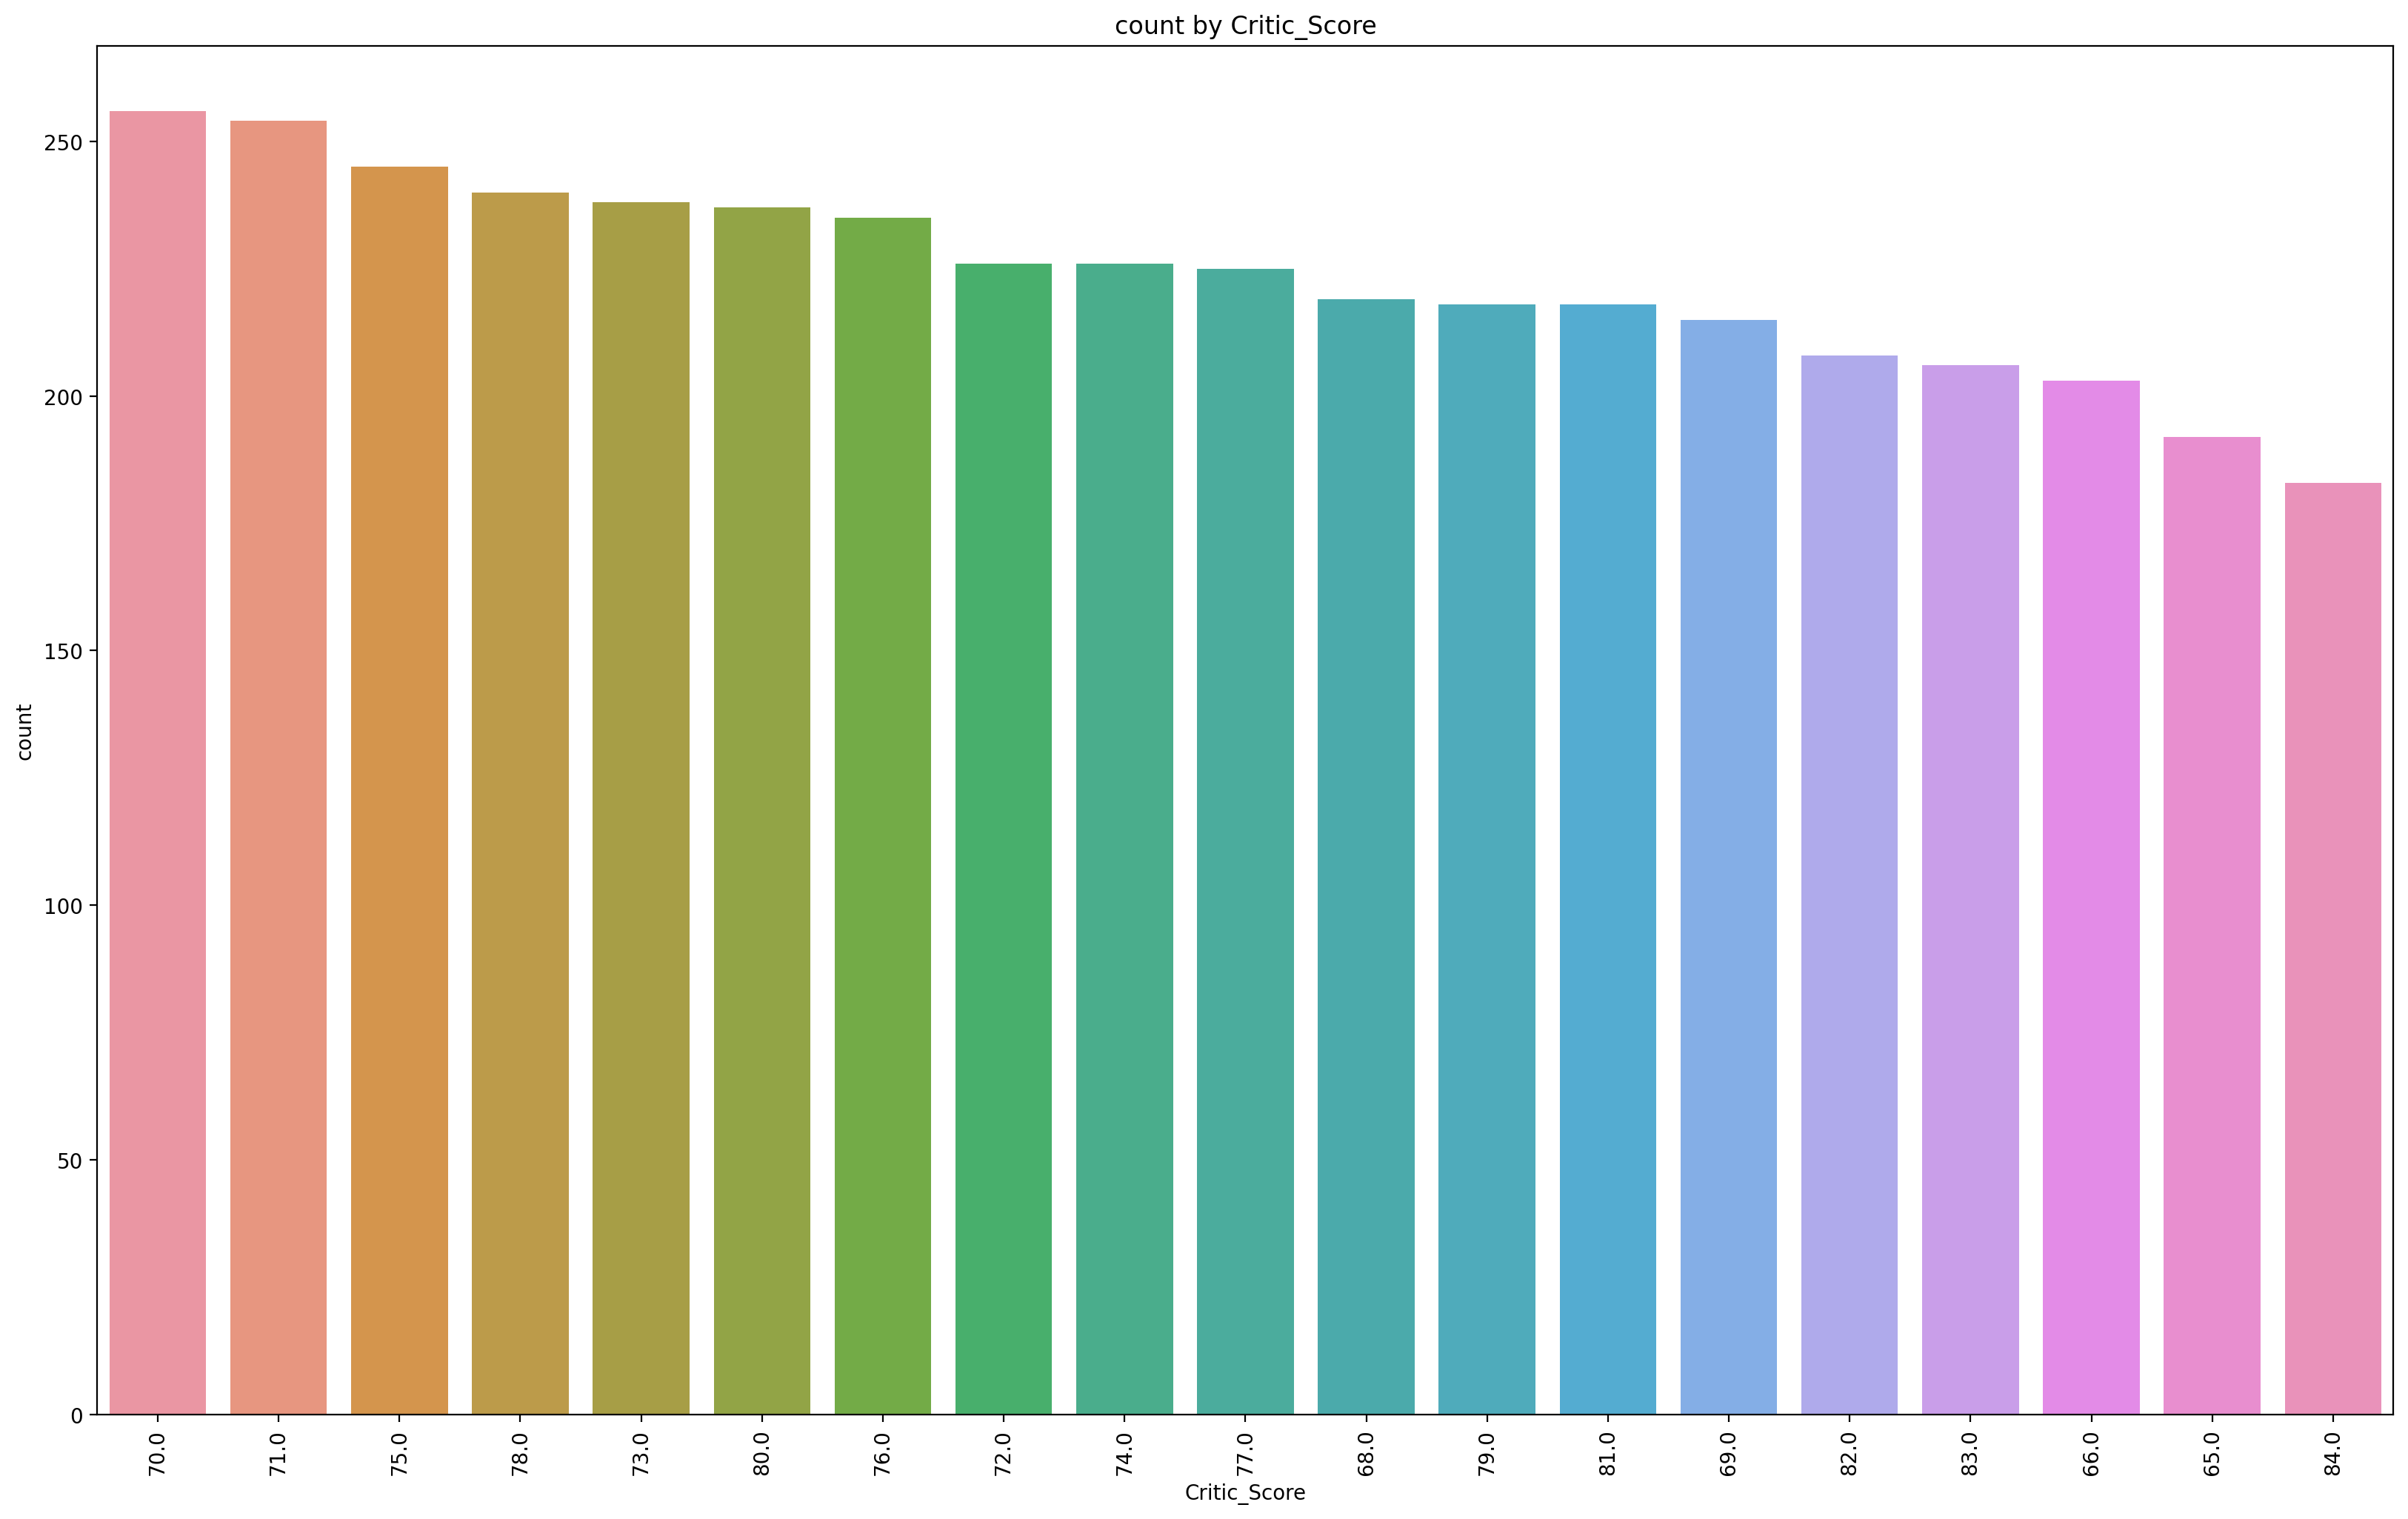

In [208]:
pyplot.figure(figsize = (20,12))
pyplot.title('count by Critic_Score')
sns.countplot(x='Critic_Score', data=data_Frame, order=data_Frame.Critic_Score.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

As we see in the graph, the ratings 70 and 71 received the same number of counts and are the highest value

Lets explore the Rating 

In [209]:
data_Frame['Rating'].describe()

count     9950
unique       8
top          E
freq      3991
Name: Rating, dtype: object

In [210]:
data_Frame['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

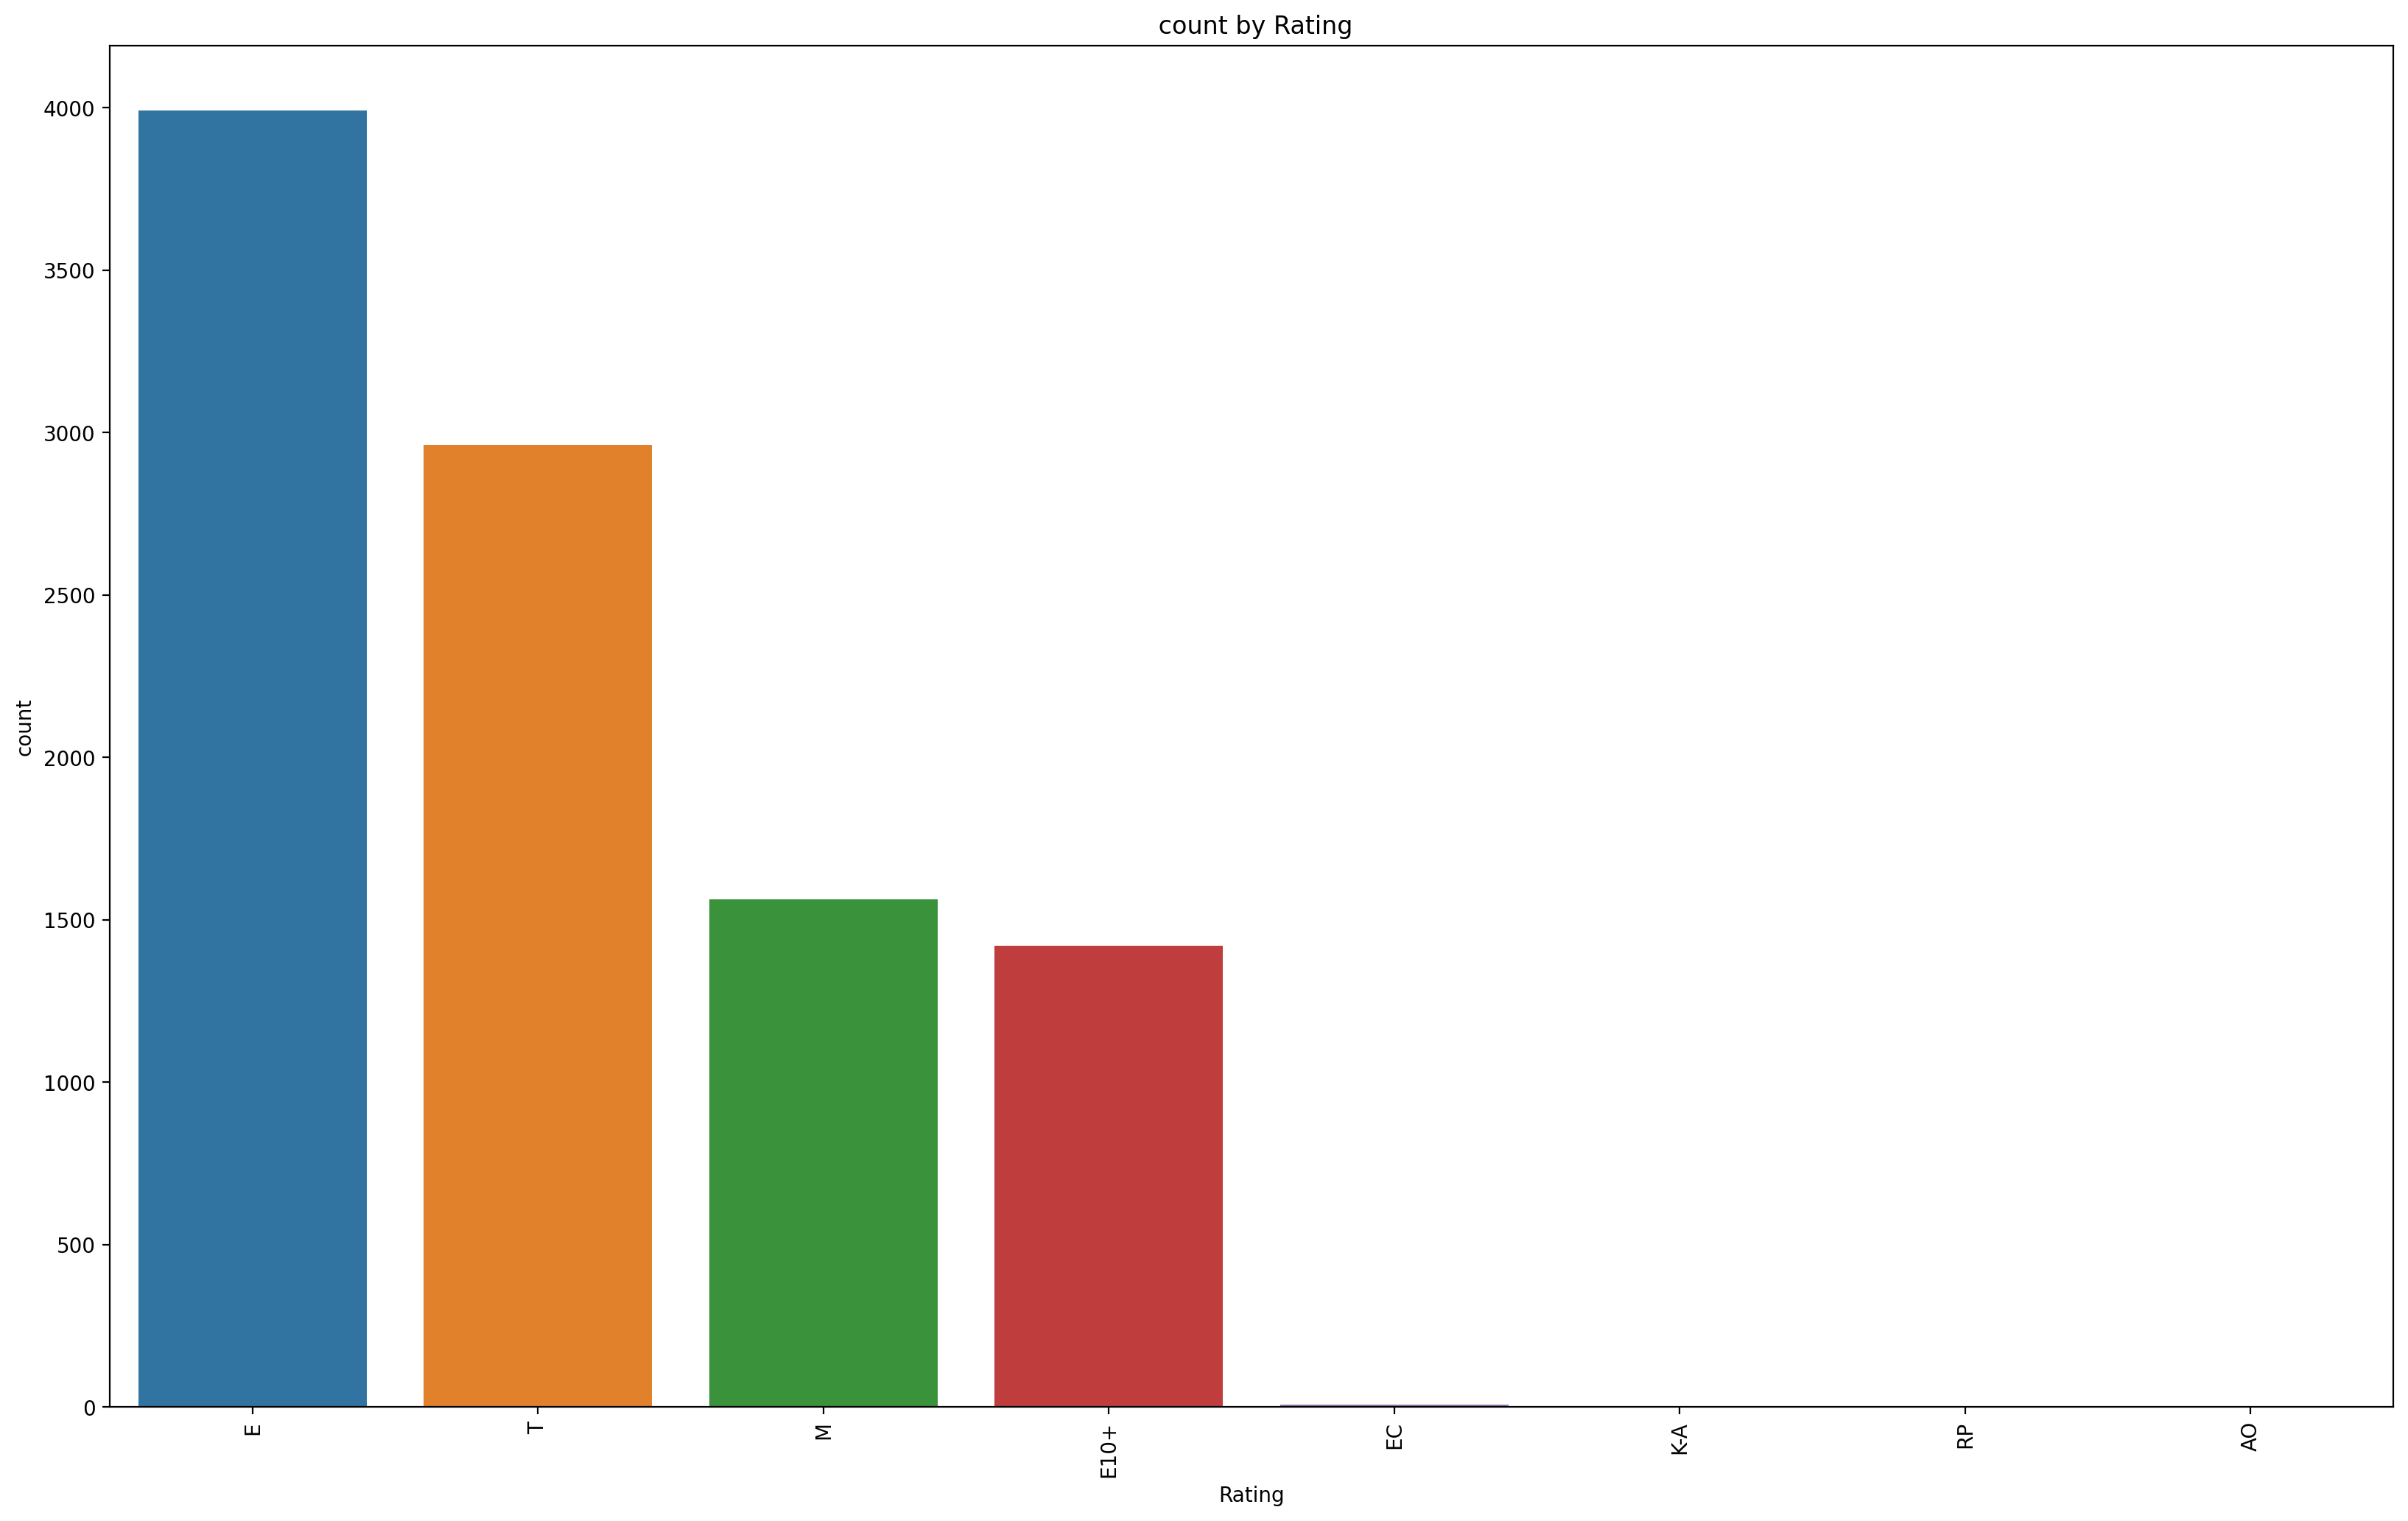

In [211]:
pyplot.figure(figsize = (20,12))
pyplot.title(' count by Rating')
sns.countplot(x='Rating', data=data_Frame, order=data_Frame.Rating.value_counts().iloc[:19].index)
pyplot.xticks(rotation= 90)
pyplot.show()

As we see in the graph, the values ​​E and T received the highest value.

E ------(13-15 Years)

T ------(15-18 Years)

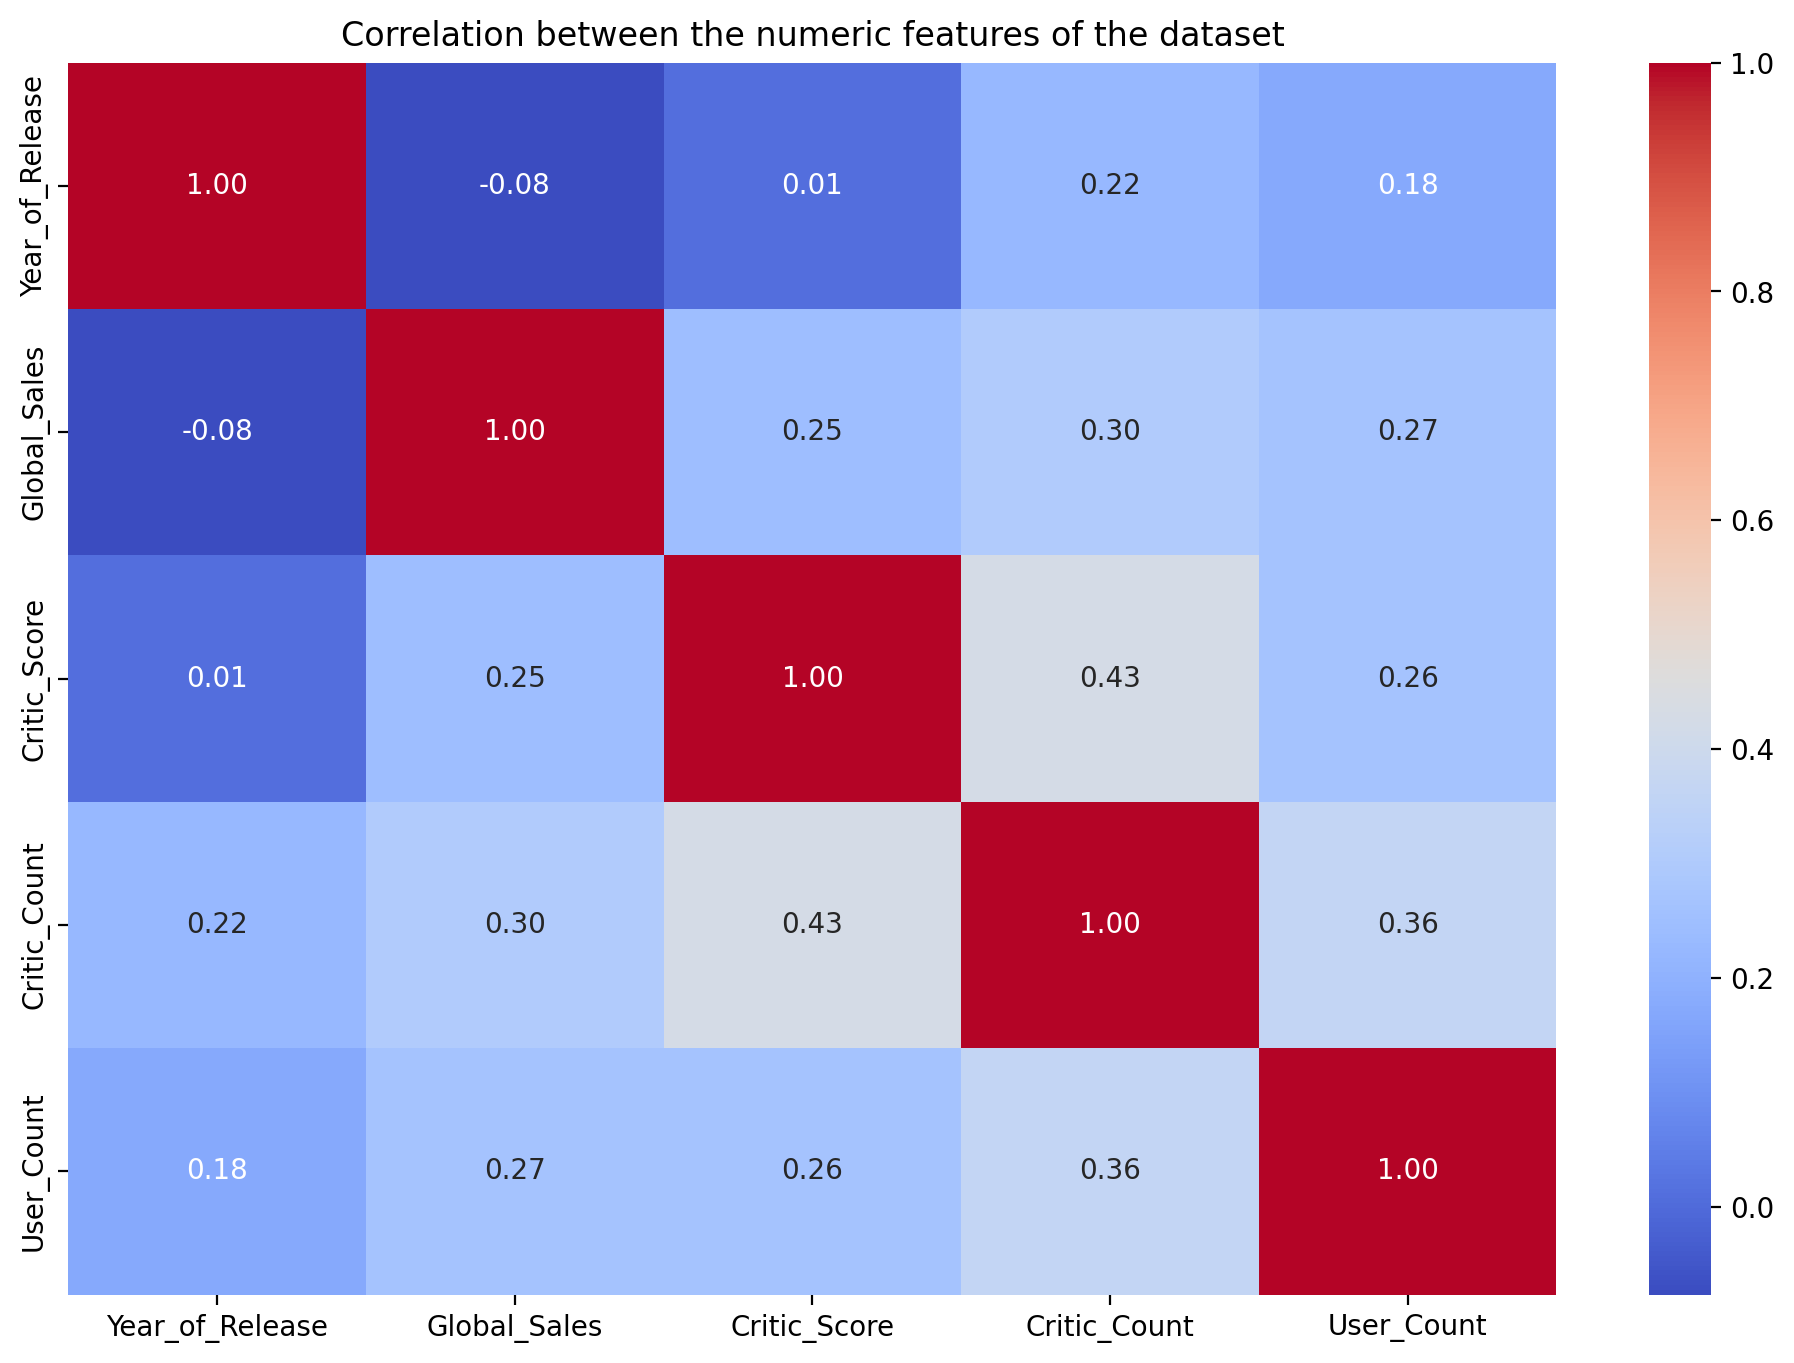

In [212]:
pyplot.figure(figsize=(12, 8))
sns.heatmap(data_Frame.corr(), annot=True, cmap="coolwarm", fmt=".2f")
pyplot.title('Correlation between the numeric features of the dataset')
pyplot.show()

c:\Users\ThinkPad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

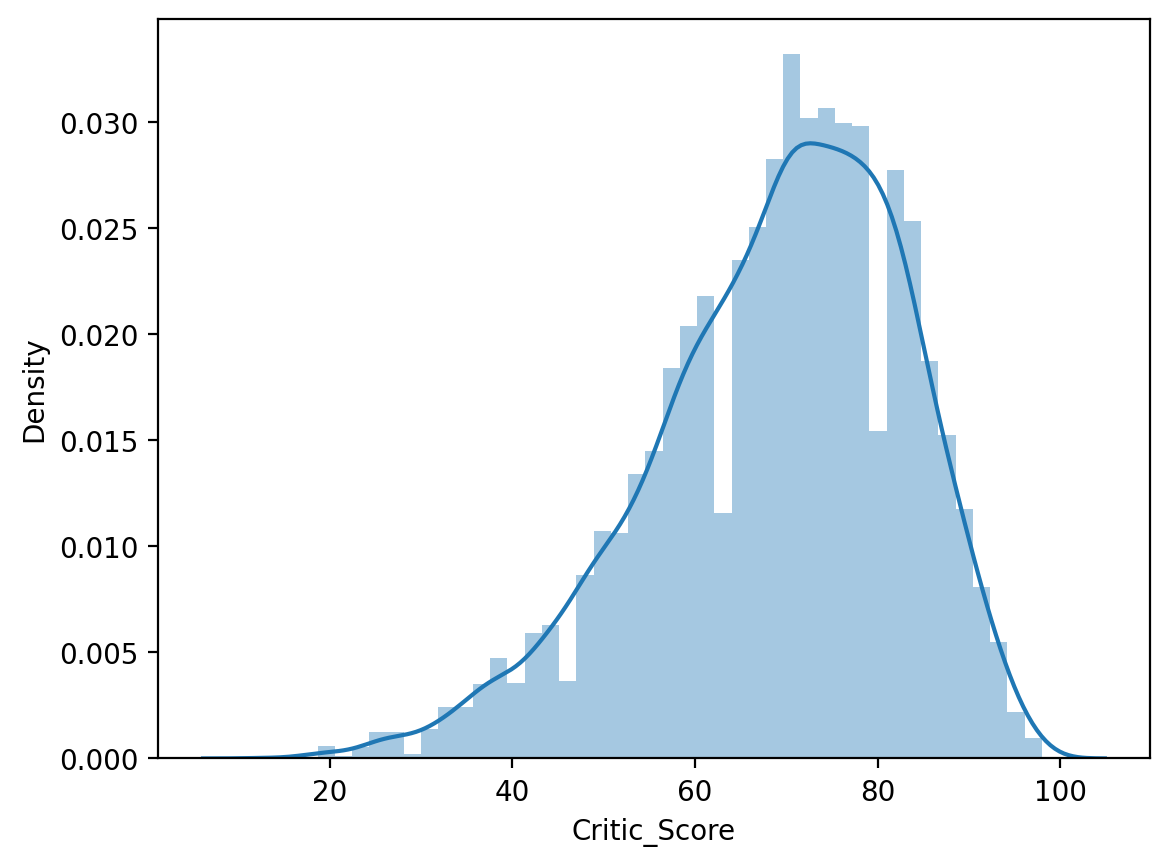

In [213]:
%config InlineBackend.figure_format = 'retina'
sns.distplot(data_Frame["Critic_Score"])

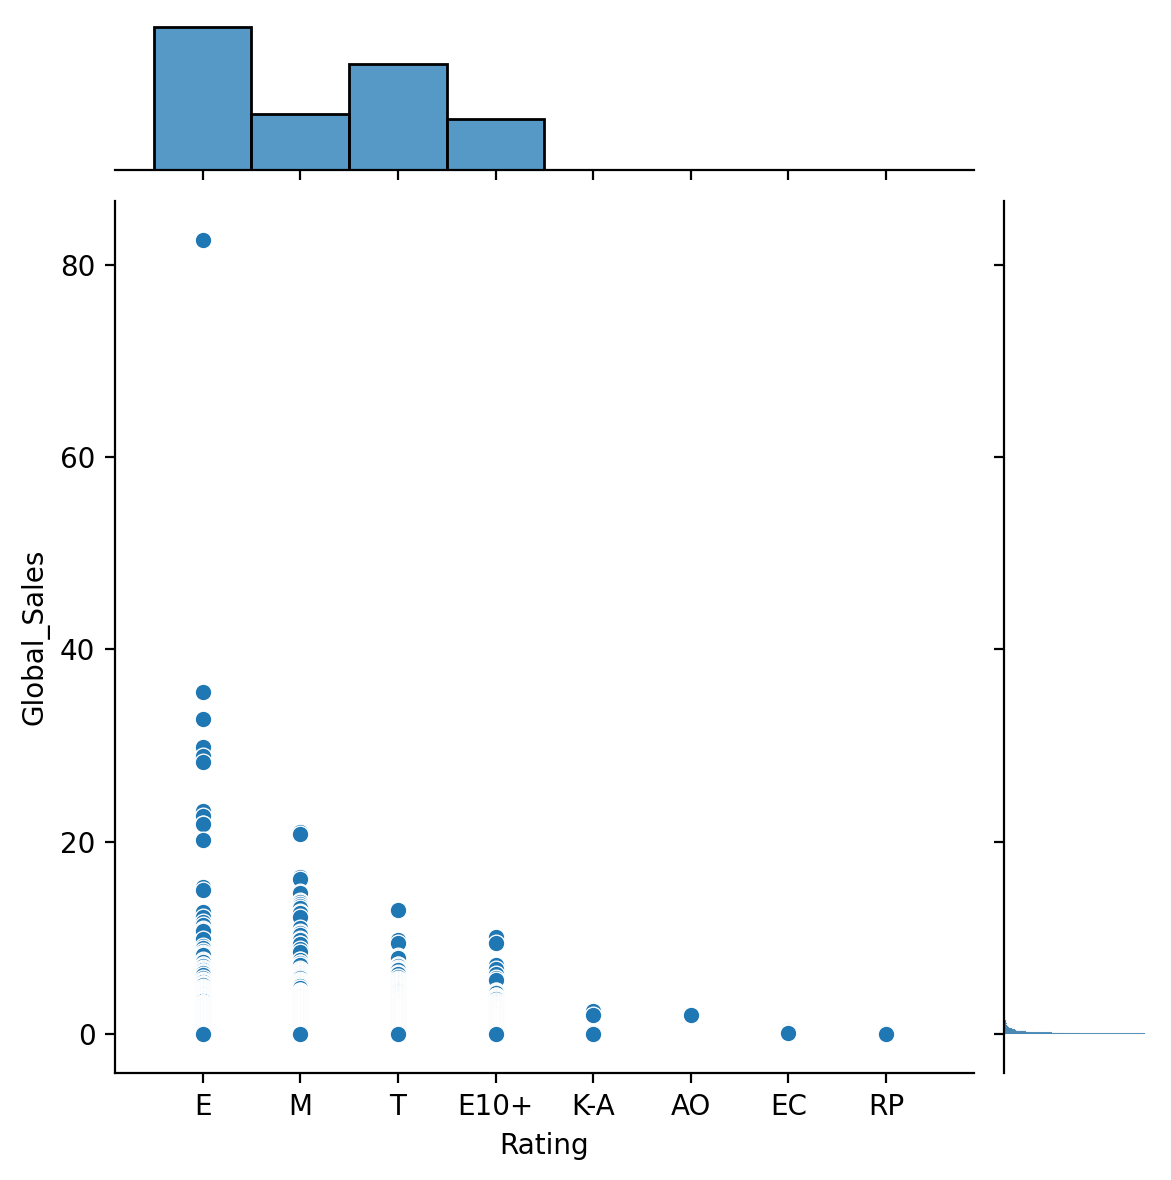

In [214]:
sns.jointplot(x="Rating", y="Global_Sales", data=data_Frame, kind="scatter")

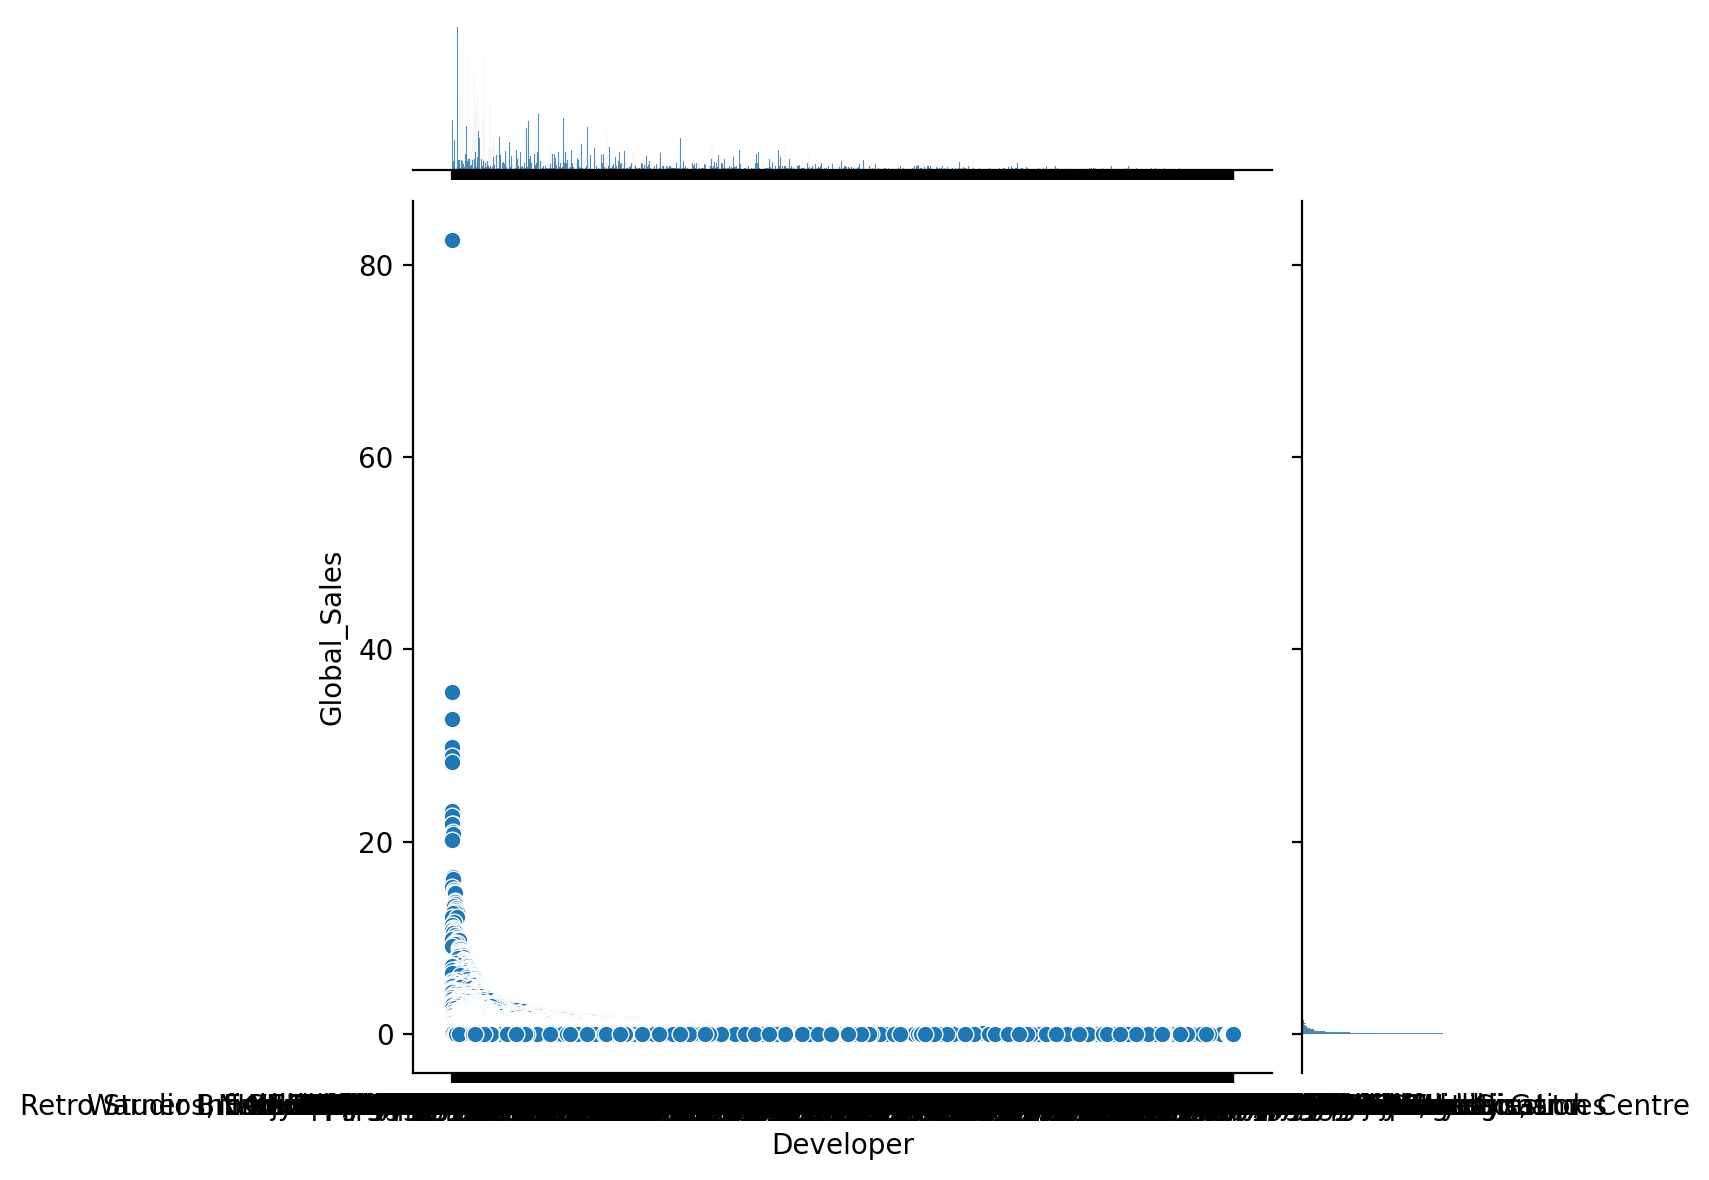

In [215]:
sns.jointplot(x="Developer", y="Global_Sales", data=data_Frame, kind="scatter")

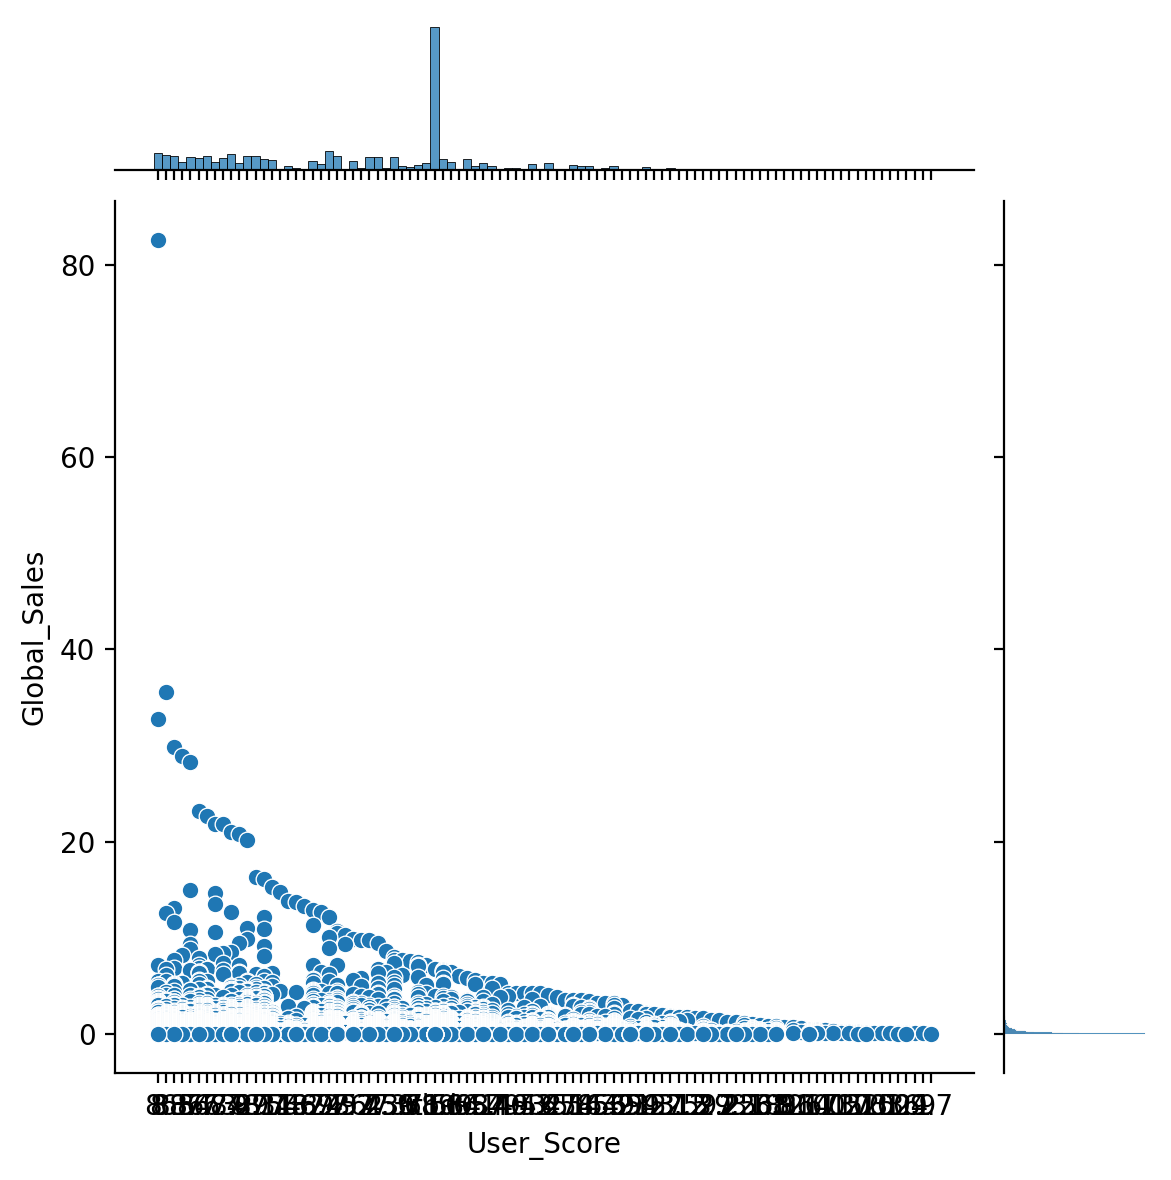

In [216]:
sns.jointplot(x="User_Score", y="Global_Sales", data=data_Frame, kind="scatter")

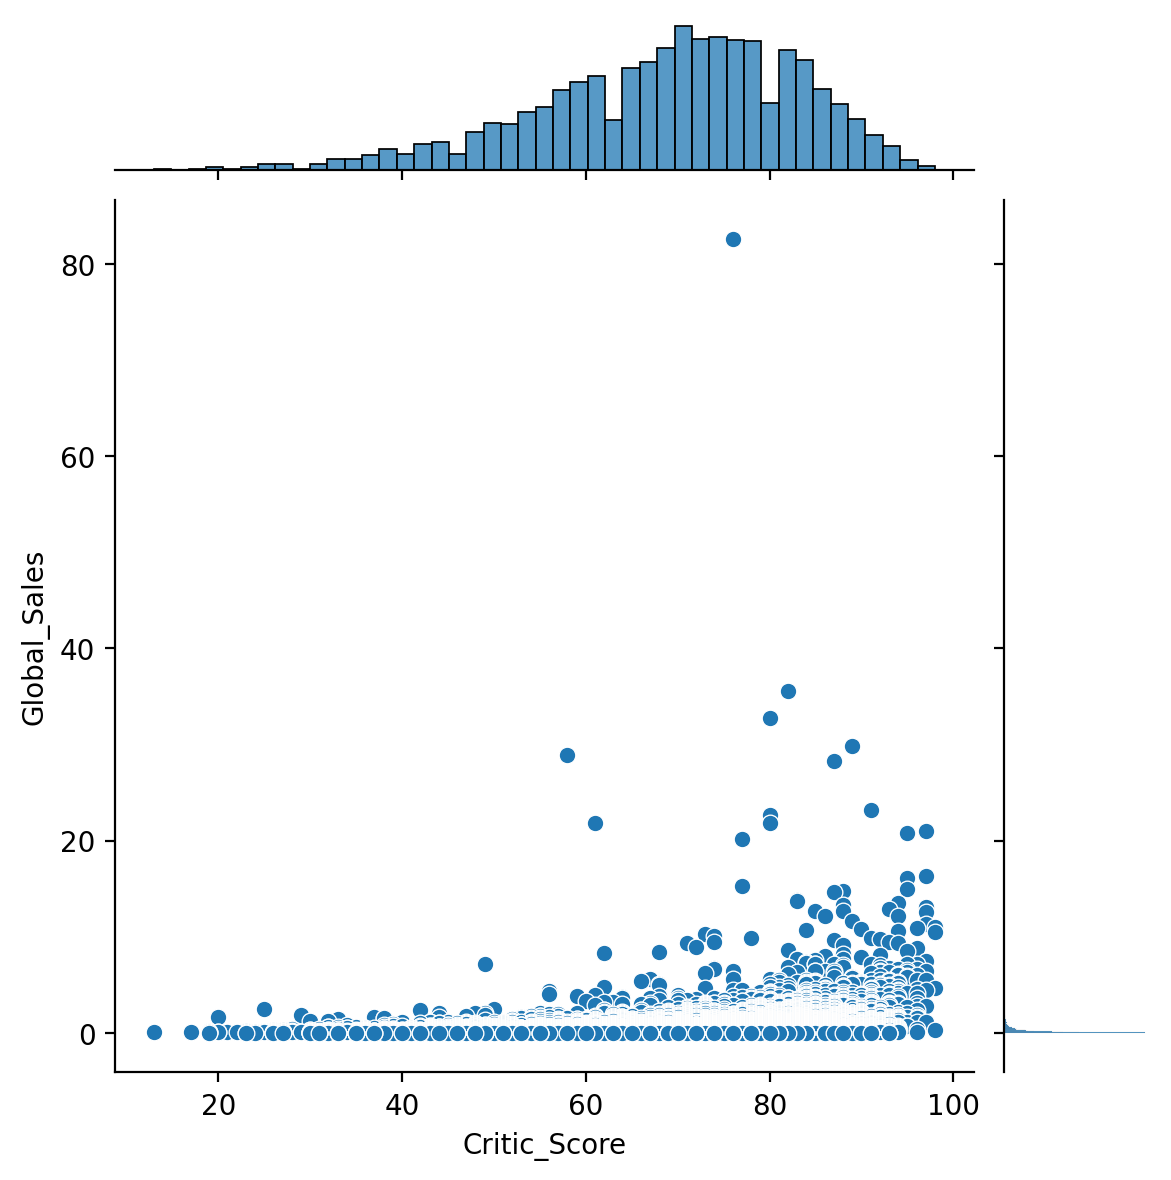

In [217]:
sns.jointplot(x="Critic_Score", y="Global_Sales", data=data_Frame, kind="scatter")

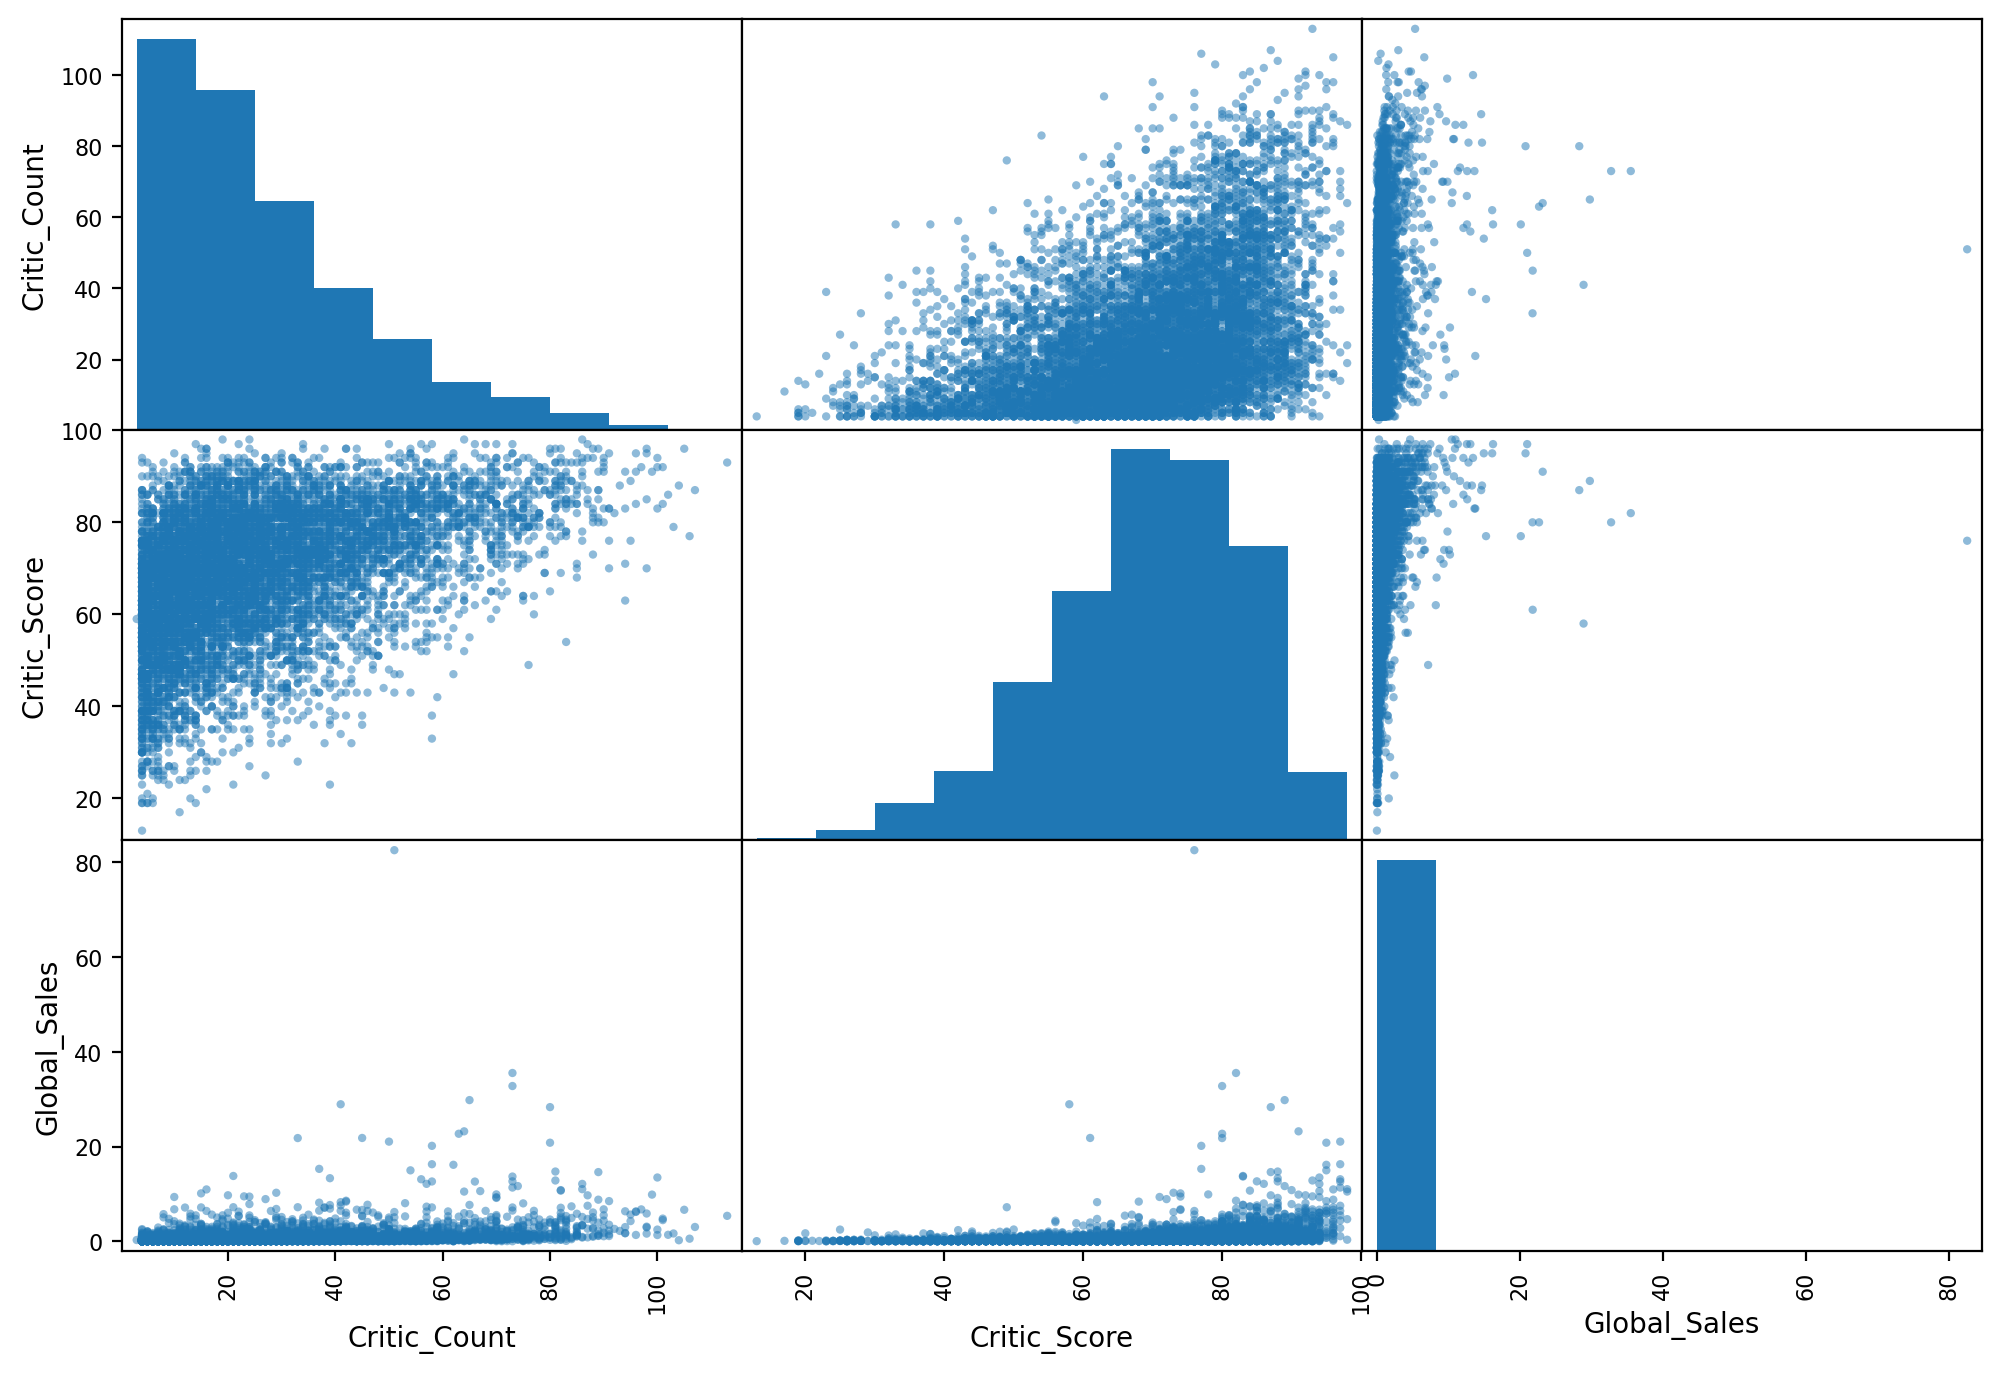

In [218]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["Critic_Count", "Critic_Score",
              "Global_Sales"]

scatter_matrix(data_Frame[attributes], figsize=(12, 8))
plt.show()


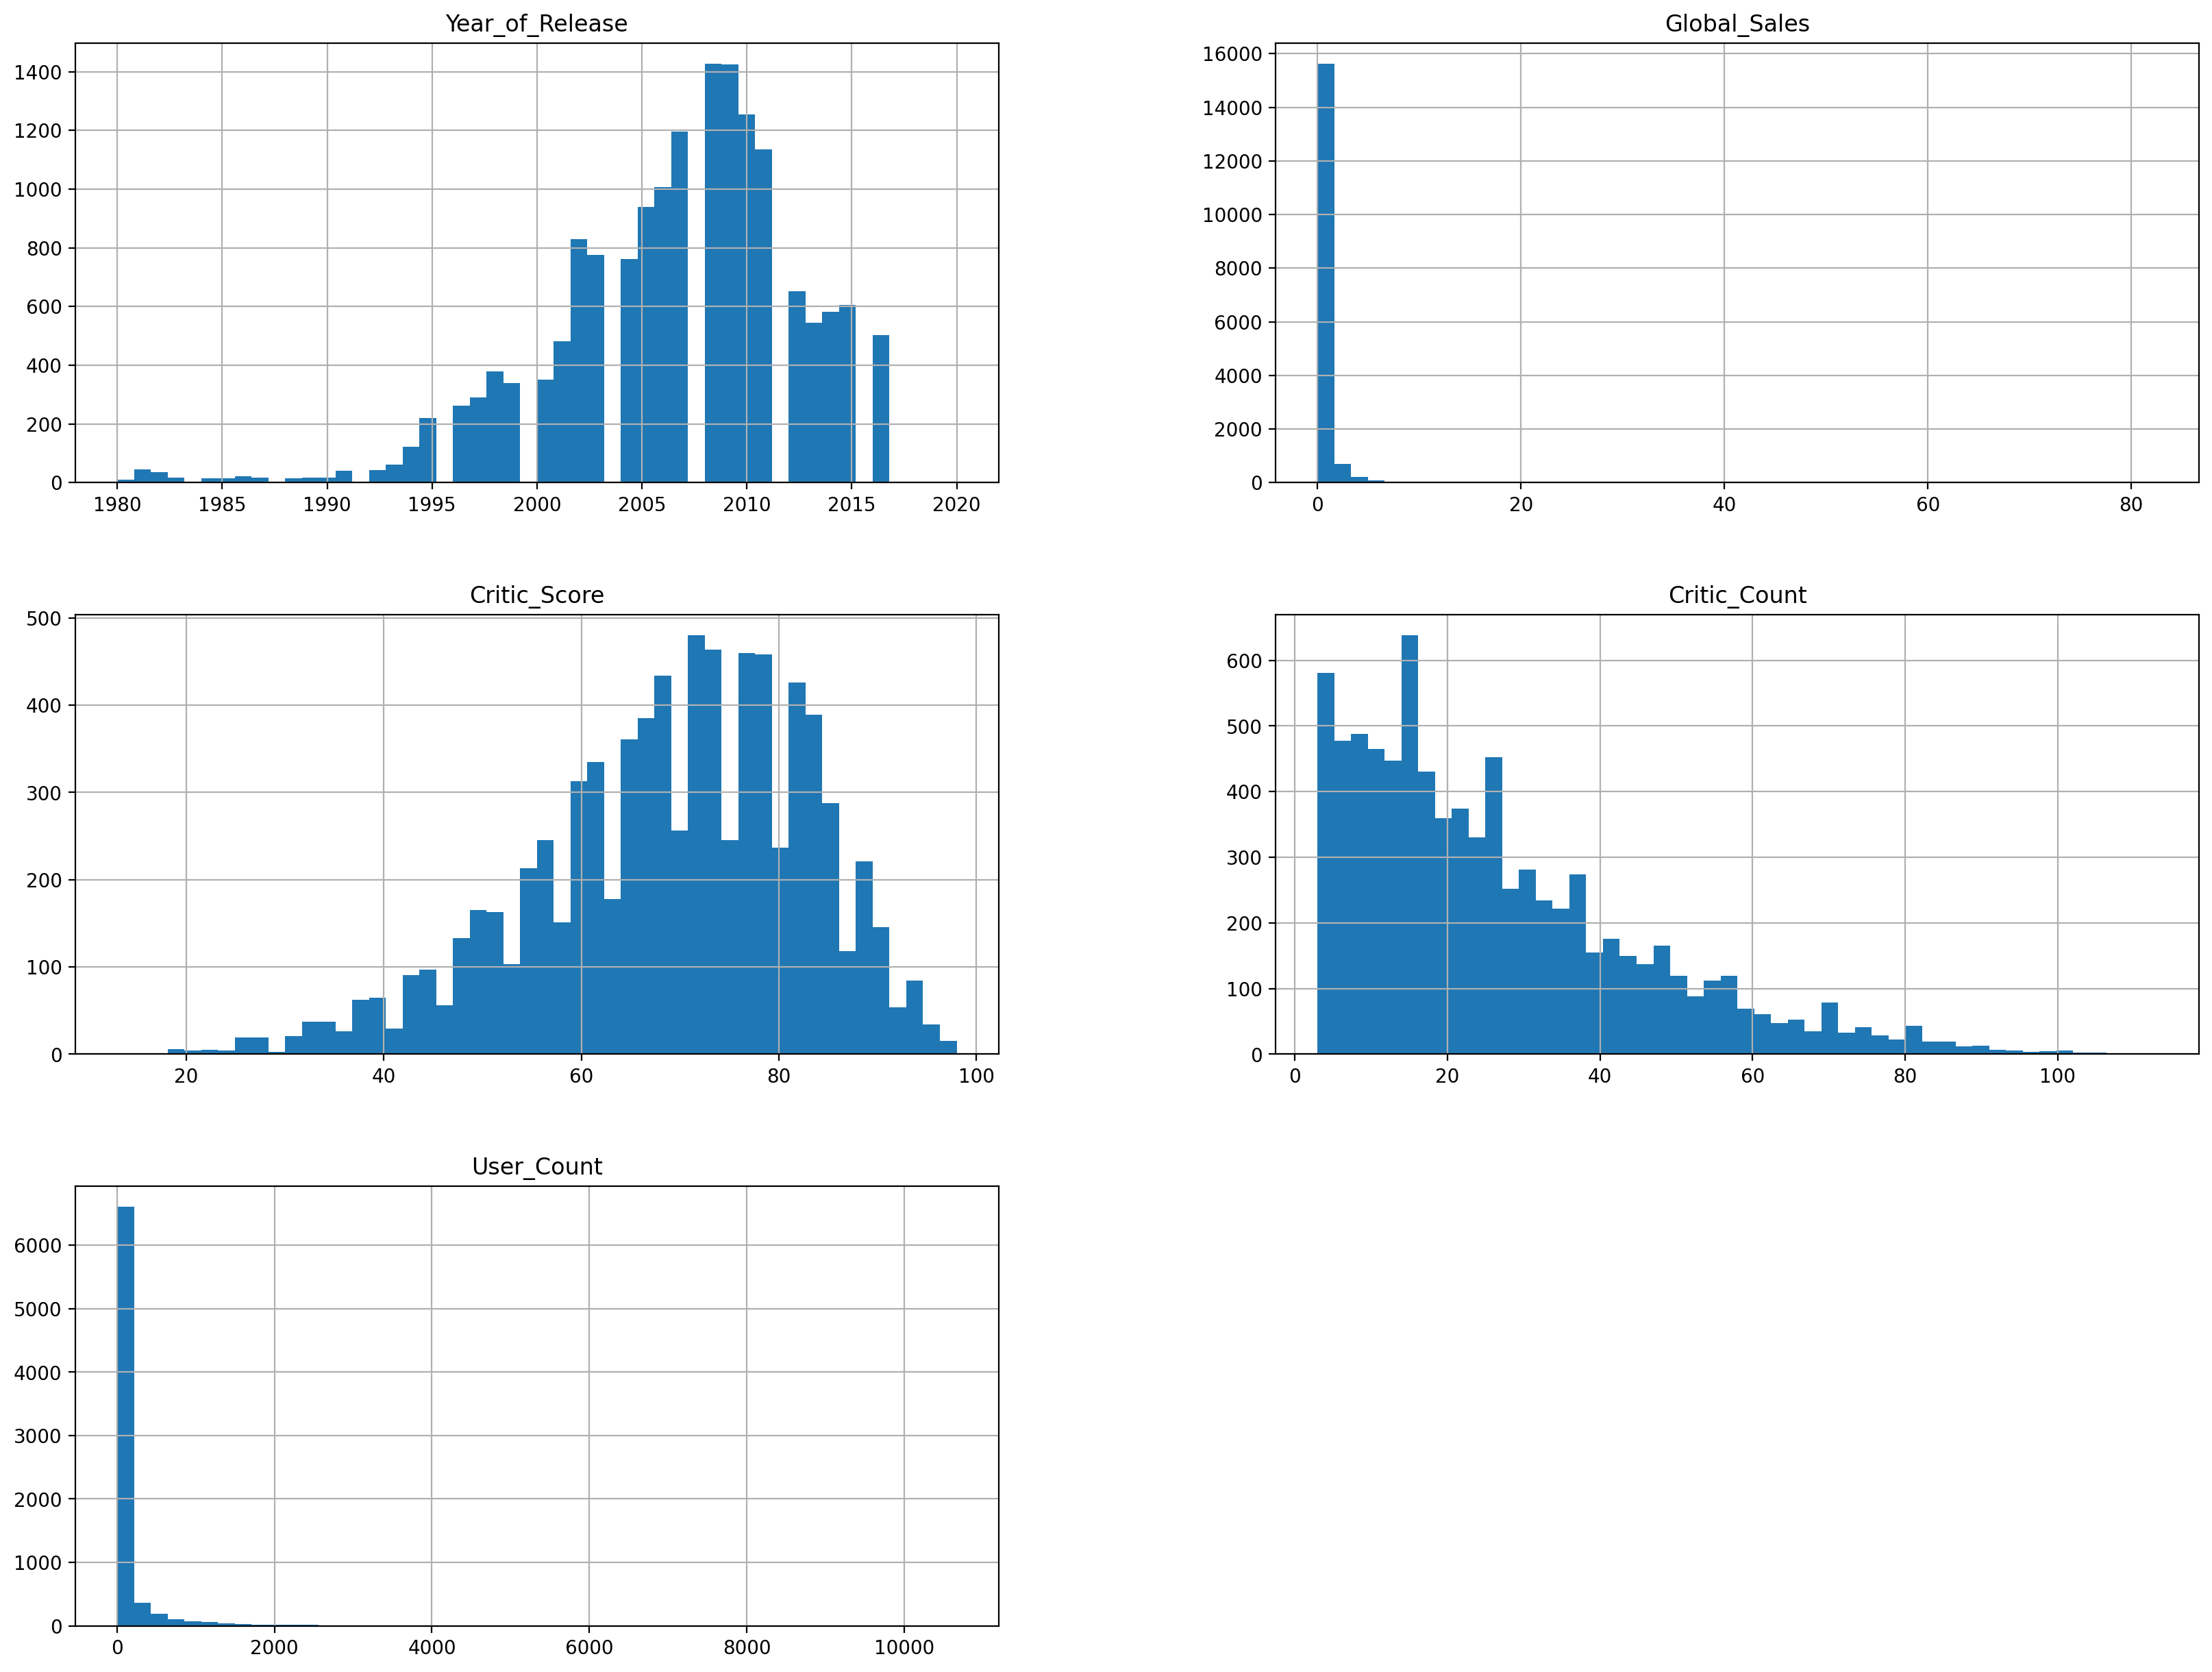

In [219]:
data_Frame.hist(bins=50, figsize=(20, 15))
plt.show()


## Data cleaning:

A graph of the data with NNa


<AxesSubplot:>

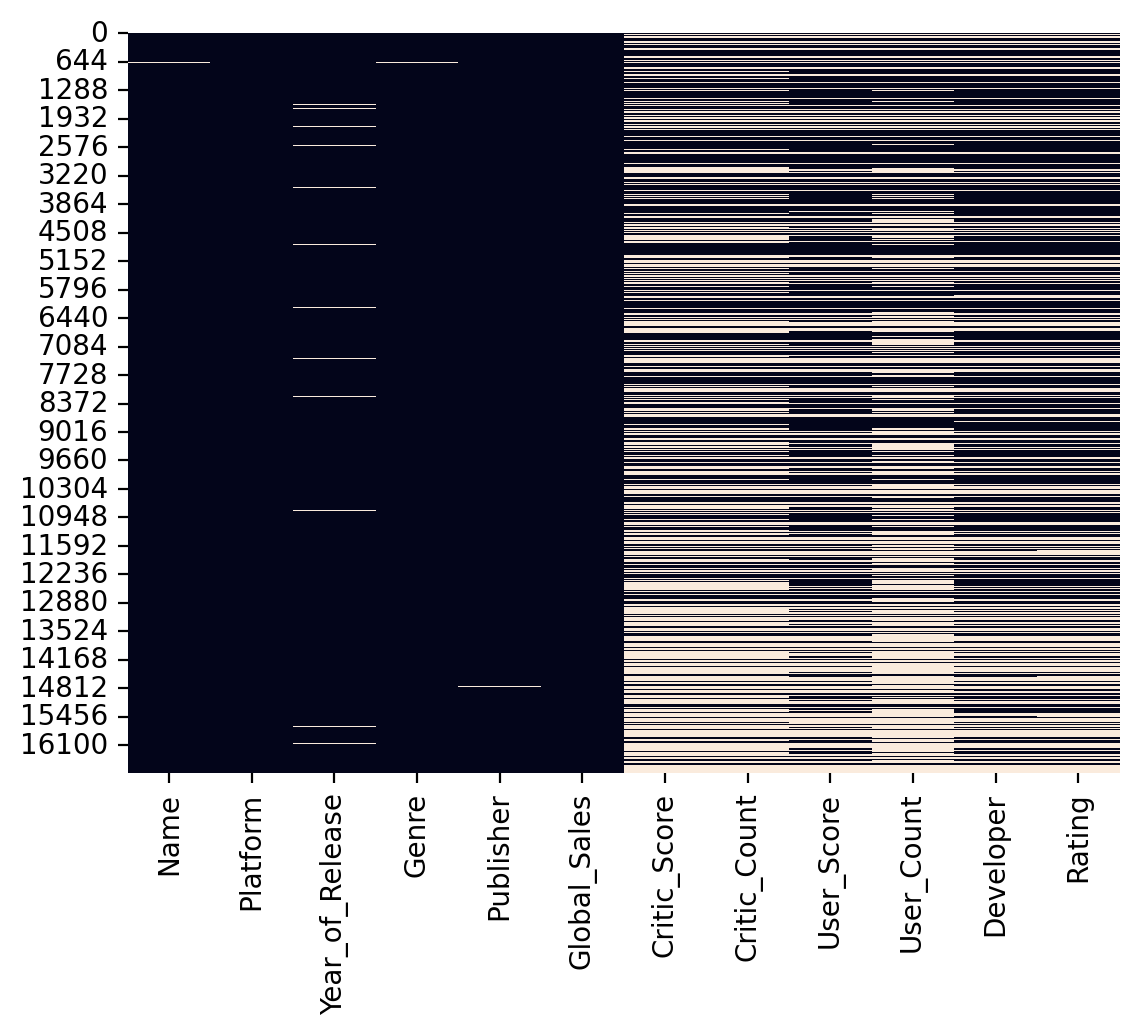

In [220]:
sns.heatmap(data_Frame.isnull(), cbar=False)


In [221]:
data_Frame.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

We deleted the user_count column because it contains a lot of NNa and because it does not greatly affect the Global_Sales column

In [222]:
data_Frame.drop('User_Count', axis=1, inplace=True)
data_Frame.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
Developer          6623
Rating             6769
dtype: int64

 In this code we will fills missing values in the Year_of_Release column with the mode, converts the column to integers, and checks for any remaining missing values in the dataset.

In [223]:
data_Frame['Year_of_Release'] = data_Frame['Year_of_Release'].fillna(data_Frame['Year_of_Release'].mode()[0])
data_Frame['Year_of_Release'] = data_Frame['Year_of_Release'].astype('int64')
data_Frame.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
Developer          6623
Rating             6769
dtype: int64

We have discovered that the user_score There is a value called 'tbd'
That is, this game was not rated by users, so we converted it to NNa and then cleaned this value

In [224]:
data_Frame['User_Score'] = data_Frame['User_Score'].replace('tbd', np.nan)

median_user_score = data_Frame['User_Score'][data_Frame['User_Score'].notna()].astype(float).median()

data_Frame['User_Score'] = data_Frame['User_Score'].fillna(median_user_score)


We deleted all the NNa values ​​because it is difficult to clean them all, so the data went from 16,000 rows to 8,000 rows without any NNa.


In [225]:
data_Frame=data_Frame.dropna()
data_Frame

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,82.53,76.0,51.0,8,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.52,82.0,73.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,32.77,80.0,73.0,8,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,29.80,89.0,65.0,8.5,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,28.92,58.0,41.0,6.6,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001,Action,Titus,0.01,67.0,9.0,7.5,Planet Interactive,E
16700,Breach,PC,2011,Shooter,Destineer,0.01,61.0,12.0,5.8,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft,0.01,53.0,4.0,7.5,Taito Corporation,E
16702,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,48.0,10.0,7.5,Interchannel-Holon,E


A graph of the data without NNa


<AxesSubplot:>

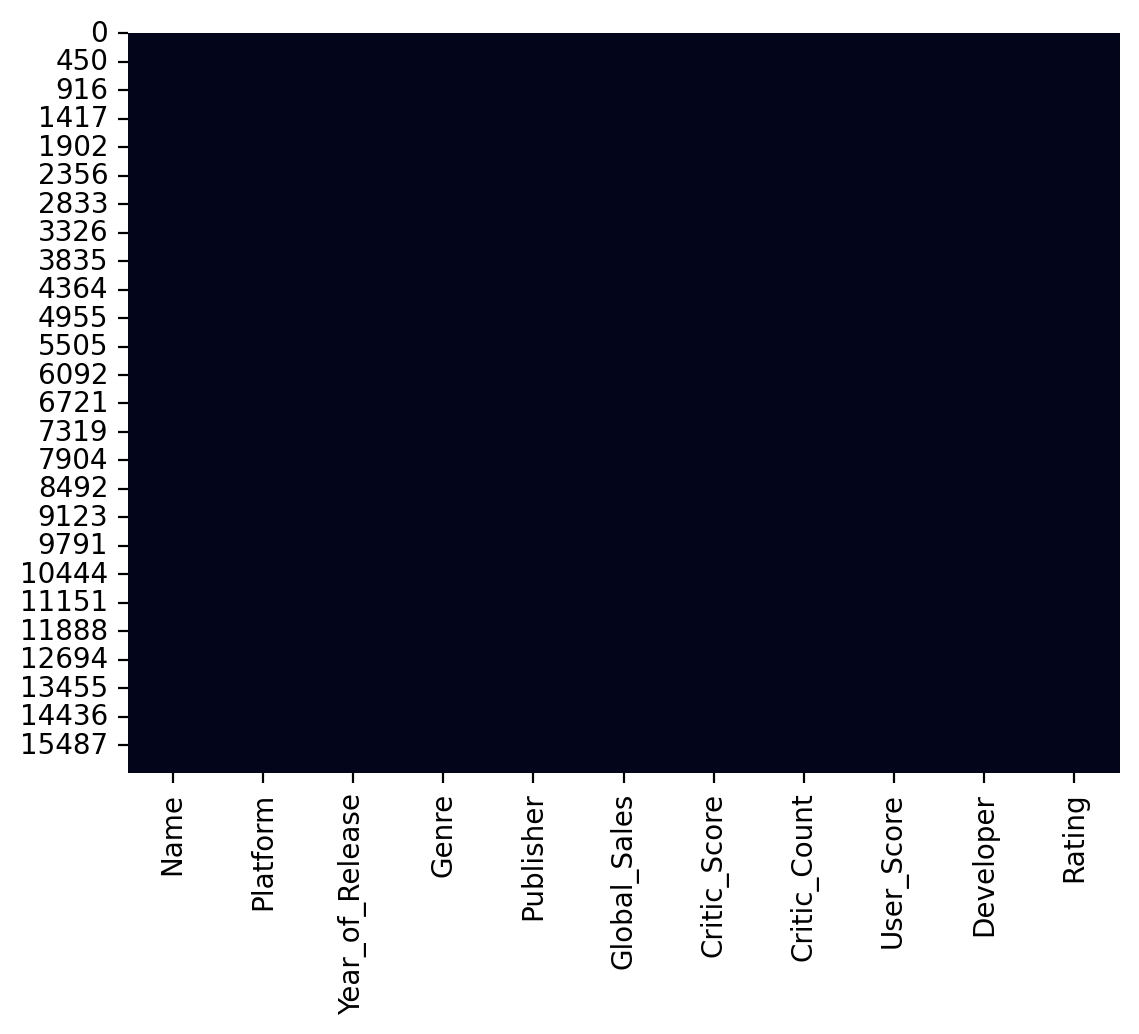

In [226]:
sns.heatmap(data_Frame.isnull(), cbar=False)

In [227]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8050 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8050 non-null   object 
 1   Platform         8050 non-null   object 
 2   Year_of_Release  8050 non-null   int64  
 3   Genre            8050 non-null   object 
 4   Publisher        8050 non-null   object 
 5   Global_Sales     8050 non-null   float64
 6   Critic_Score     8050 non-null   float64
 7   Critic_Count     8050 non-null   float64
 8   User_Score       8050 non-null   object 
 9   Developer        8050 non-null   object 
 10  Rating           8050 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 754.7+ KB


## Encoding

In [228]:
from sklearn.preprocessing import OrdinalEncoder

data_Frame_Ordinal=data_Frame.copy()
rating_counts = data_Frame_Ordinal['Rating'].value_counts()
sorted_ratings = rating_counts.index.tolist()

Genre_counts = data_Frame_Ordinal['Genre'].value_counts()
sorted_Genre = Genre_counts.index.tolist()

Platform_counts = data_Frame_Ordinal['Platform'].value_counts()
sorted_Platform = Platform_counts.index.tolist()

Publisher_counts = data_Frame_Ordinal['Publisher'].value_counts()
sorted_Publisher = Publisher_counts.index.tolist()



categories_list = [
    sorted_ratings[::-1], 
    sorted_Genre[::-1],
    sorted_Platform[::-1], 
    sorted_Publisher[::-1],
]

ordinal_encoder = OrdinalEncoder(categories=categories_list)

encoded_columns = ordinal_encoder.fit_transform(data_Frame_Ordinal[['Rating', 'Genre','Platform','Publisher']])  

data_Frame_Ordinal['Rating_Ordinal'] = encoded_columns[:, 0].astype(int) 
data_Frame_Ordinal['Genre_Ordinal'] = encoded_columns[:, 1].astype(int)  
data_Frame_Ordinal['Platform_Ordinal'] = encoded_columns[:, 2].astype(int)  
data_Frame_Ordinal['Publisher_Ordinal'] = encoded_columns[:, 3].astype(int)  





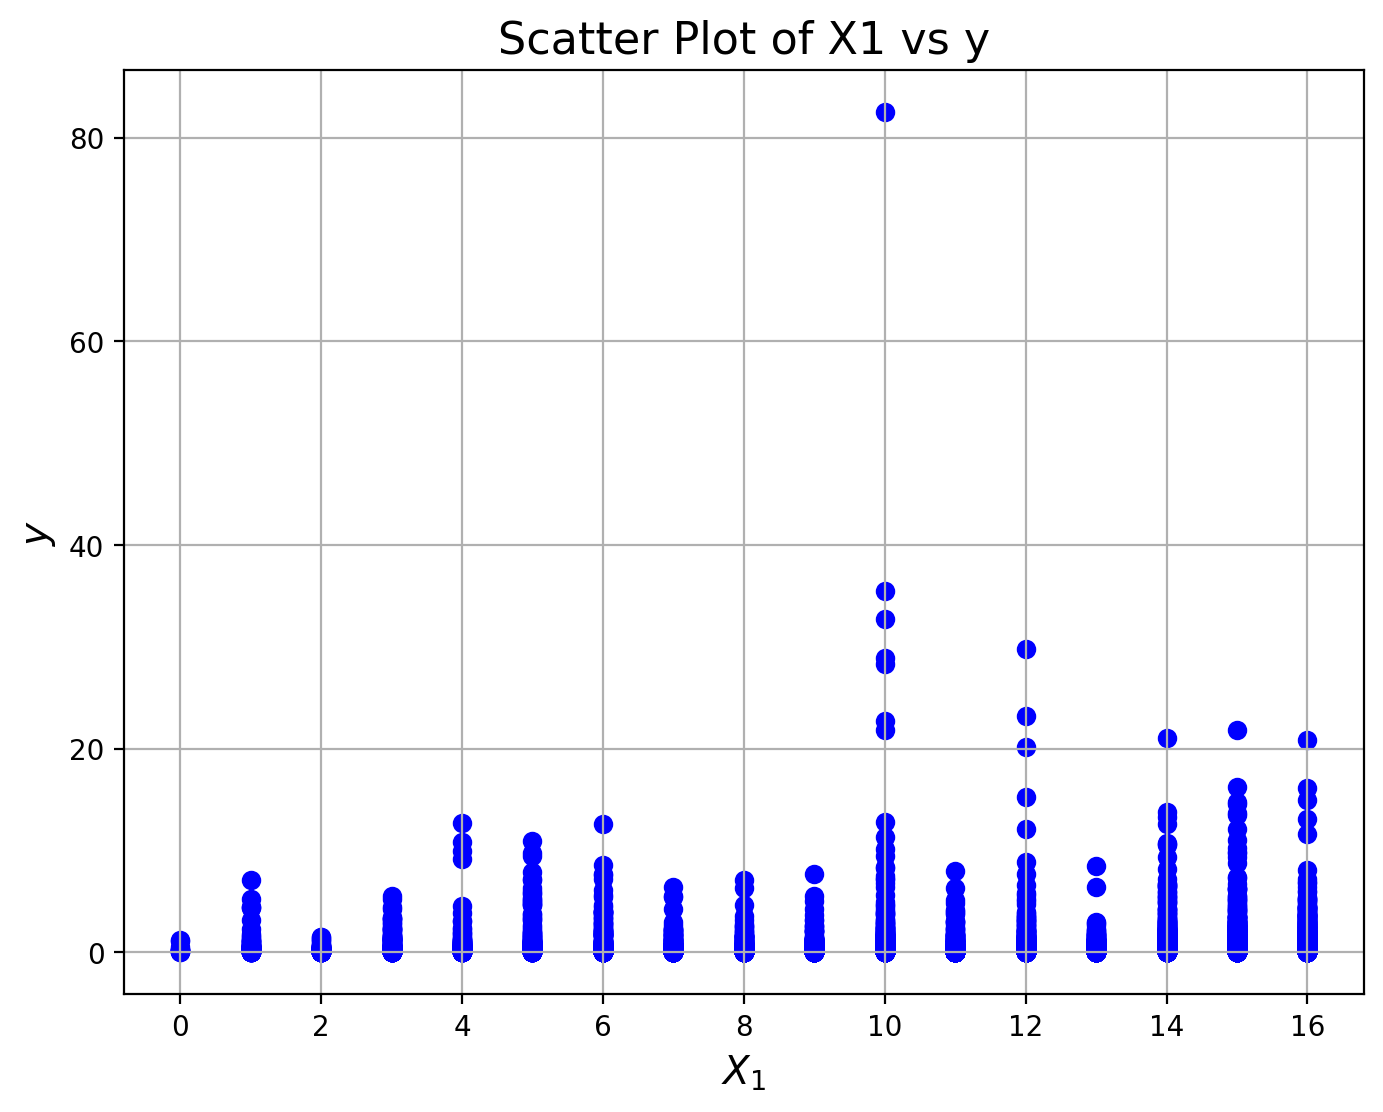

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

X = data_Frame_Ordinal[['Platform_Ordinal'
                       ]].values
y = data_Frame_Ordinal['Global_Sales'].values

# رسم نقاط البيانات
plt.figure(figsize=(8, 6))  # تحديد حجم الشكل
plt.scatter(X, y, color='blue')  # رسم scatter plot باللون الأزرق
plt.xlabel(r'$X_1$', fontsize=14)  # تسمية المحور X
plt.ylabel(r'$y$', fontsize=14)  # تسمية المحور Y
plt.title("Scatter Plot of X1 vs y", fontsize=16)  # عنوان الرسم

# تحسين المظهر
plt.grid(True)  # إضافة شبكة
plt.show()


In [230]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd

# Assuming 'data_Frame' is your DataFrame

# Select the numerical columns to scale
numerical_features = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score','Year_of_Release',
                      'Rating_Ordinal', 'Genre_Ordinal', 'Platform_Ordinal', 'Publisher_Ordinal',
                    ]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_Frame_minmax = data_Frame_Ordinal.copy()
data_Frame_minmax[numerical_features] = min_max_scaler.fit_transform(data_Frame_Ordinal[numerical_features])

# Display scaled data
print("Min-Max Scaled Data:")
print(data_Frame_minmax.head())


Min-Max Scaled Data:
                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii         0.677419    Sports  Nintendo   
2         Mario Kart Wii      Wii         0.741935    Racing  Nintendo   
3      Wii Sports Resort      Wii         0.774194    Sports  Nintendo   
6  New Super Mario Bros.       DS         0.677419  Platform  Nintendo   
7               Wii Play      Wii         0.677419      Misc  Nintendo   

   Global_Sales  Critic_Score  Critic_Count  User_Score Developer Rating  \
0      1.000000      0.741176      0.436364    0.824176  Nintendo      E   
2      0.430320      0.811765      0.636364    0.857143  Nintendo      E   
3      0.396995      0.788235      0.636364    0.824176  Nintendo      E   
6      0.361003      0.894118      0.563636    0.879121  Nintendo      E   
7      0.350339      0.529412      0.345455    0.670330  Nintendo      E   

   Rating_Ordinal  Genre_Ordinal  Platform_Ordinal  Publisher_Ordinal  
0    

In [231]:
# Standardization
standard_scaler = StandardScaler()
data_Frame_standardized = data_Frame_Ordinal.copy()
data_Frame_standardized[numerical_features] = standard_scaler.fit_transform(data_Frame_Ordinal[numerical_features])

print("Standardized Data:")
print(data_Frame_standardized.head())


Standardized Data:
                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii        -0.282312    Sports  Nintendo   
2         Mario Kart Wii      Wii         0.202408    Racing  Nintendo   
3      Wii Sports Resort      Wii         0.444768    Sports  Nintendo   
6  New Super Mario Bros.       DS        -0.282312  Platform  Nintendo   
7               Wii Play      Wii        -0.282312      Misc  Nintendo   

   Global_Sales  Critic_Score  Critic_Count  User_Score Developer Rating  \
0     44.833948      0.503564      1.291504    0.575403  Nintendo      E   
2     19.079237      0.933763      2.448108    0.798865  Nintendo      E   
3     17.572633      0.790363      2.448108    0.575403  Nintendo      E   
6     15.945500      1.435661      2.027525    0.947840  Nintendo      E   
7     15.463387     -0.787032      0.765775   -0.467420  Nintendo      E   

   Rating_Ordinal  Genre_Ordinal  Platform_Ordinal  Publisher_Ordinal  
0      

In [232]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Feature matrix and target vector
X = data_Frame_minmax[['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal', 
                       'Publisher_Ordinal','Critic_Count','User_Score']].values
y = data_Frame_minmax['Global_Sales'].values


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linreg = linear_model.LinearRegression()
linreg_model = linreg.fit(X_train, y_train)

# Predictions
linreg_pred = linreg_model.predict(X_test)

# Display Predictions and Actual Values
print("Sample predictions:")
print(linreg_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

# Error Metrics
print('Mean Absolute Error of Linear Regression:', metrics.mean_absolute_error(y_test, linreg_pred))
print('Root Mean Squared Error of Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

# R-squared
r2 = r2_score(y_test, linreg_pred)
print(f"R^2 Score: {r2}")



Sample predictions:
[ 0.02225054  0.01403664  0.00247562  0.00171447  0.00214404 -0.00215728
  0.00569105  0.01886953 -0.00207084  0.00600496]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]
Mean Absolute Error of Linear Regression: 0.008151197983629257
Root Mean Squared Error of Linear Regression: 0.014671387344628545
R^2 Score: 0.19170169760677436


In [233]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

linreg_poly = linear_model.LinearRegression()
linreg_poly.fit(X_train_poly, y_train_poly)
poly_pred = linreg_poly.predict(X_test_poly)

print("R^2 Score for Polynomial Regression:", r2_score(y_test_poly, poly_pred))


R^2 Score for Polynomial Regression: 0.3792218126482405


In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature matrix and target vector
X = data_Frame_minmax[['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal', 
                       'Publisher_Ordinal','Critic_Count','User_Score']].values
y = data_Frame_minmax['Global_Sales'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=185, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Display Predictions and Actual Values
print("Sample predictions:")
print(rf_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

# Error Metrics
print('Mean Absolute Error of Random Forest:', mean_absolute_error(y_test, rf_pred))
print('Root Mean Squared Error of Random Forest:', np.sqrt(mean_squared_error(y_test, rf_pred)))

# R-squared
r2 = r2_score(y_test, rf_pred)
print(f"R^2 Score: {r2}")


Sample predictions:
[0.01357312 0.00906578 0.00334661 0.00225531 0.00392698 0.00357391
 0.00437109 0.02564358 0.00319726 0.01716144]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]
Mean Absolute Error of Random Forest: 0.0064026927997717685
Root Mean Squared Error of Random Forest: 0.0131463218125722
R^2 Score: 0.3510102781769697


In [235]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature matrix and target vector
X = data_Frame_minmax[['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal', 
                       'Publisher_Ordinal','Critic_Count','User_Score']].values
y = data_Frame_minmax['Global_Sales'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_pred = xgb_model.predict(X_test)

# Display Predictions and Actual Values
print("Sample predictions:")
print(xgb_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

# Error Metrics
print('Mean Absolute Error of XGBoost:', mean_absolute_error(y_test, xgb_pred))
print('Root Mean Squared Error of XGBoost:', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# R-squared
r2 = r2_score(y_test, xgb_pred)
print(f"R^2 Score: {r2}")


Sample predictions:
[0.009047   0.00899352 0.00294059 0.00251778 0.00162149 0.00259789
 0.00444633 0.02110584 0.00410569 0.007701  ]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]
Mean Absolute Error of XGBoost: 0.00600691450492917
Root Mean Squared Error of XGBoost: 0.012331880040996723
R^2 Score: 0.428931923513283


In [236]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# تأكد من أن البيانات قد تم تحميلها بشكل صحيح
# Feature matrix and target vector
X = data_Frame_minmax.loc[:, ['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal', 
                               'Publisher_Ordinal', 'Critic_Count', 'User_Score']].values
y = data_Frame_minmax['Global_Sales'].values


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, 
                         learning_rate=0.1, 
                         max_depth=6, 
                         random_state=42,
                         subsample=0.8,  # إضافة زيادة مرونة في عينة البيانات
                         colsample_bytree=0.8,  # تحسين استخدام الأعمدة
                         objective='reg:squarederror')  # استخدام الهدف الصحيح في الانحدار

# تدريب النموذج
xgb_model.fit(X_train, y_train)

# التنبؤ بالقيم
xgb_pred = xgb_model.predict(X_test)

# عرض بعض العينات من التنبؤات والقيم الفعلية
print("Sample predictions:")
print(xgb_pred[:10])  

print("\nActual values:")
print(y_test[:10])  

# حساب المقاييس (الأخطاء)
mae = mean_absolute_error(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f'\nMean Absolute Error of XGBoost: {mae}')
print(f'Root Mean Squared Error of XGBoost: {rmse}')
r2 = r2_score(y_test, xgb_pred)
print(f"R^2 Score: {r2}")

# عرض أهمية الميزات
importances = xgb_model.feature_importances_
feature_names = ['Platform_Ordinal', 'Genre_Ordinal', 'Critic_Score', 'Rating_Ordinal', 
                 'Publisher_Ordinal', 'Critic_Count', 'User_Score']
print("\nFeature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Sample predictions:
[0.01011646 0.00608827 0.0018982  0.00250817 0.00225223 0.00212836
 0.00354225 0.01347439 0.00710339 0.00763565]

Actual values:
[0.01987397 0.01090645 0.00145419 0.00206011 0.00084828 0.0007271
 0.00387785 0.00666505 0.00290839 0.02605429]

Mean Absolute Error of XGBoost: 0.005891186246159913
Root Mean Squared Error of XGBoost: 0.012036016751200163
R^2 Score: 0.4560050510307252

Feature Importances:
Platform_Ordinal: 0.2271
Genre_Ordinal: 0.0888
Critic_Score: 0.1448
Rating_Ordinal: 0.1786
Publisher_Ordinal: 0.1234
Critic_Count: 0.1630
User_Score: 0.0743


In [237]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid for GridSearchCV
param_grid = {
'n_estimators': [50, 100, 200, 300, 500],
'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
'max_depth': [3, 5, 7, 9, 11],
'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predictions and evaluation
best_predictions = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, best_predictions)
rmse = np.sqrt(mean_squared_error(y_test, best_predictions))
r2 = r2_score(y_test, best_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Display top results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
top_results = results.sort_values(by='mean_test_score', ascending=False).head(10)
print("Top parameter combinations and their R² scores:")
print(top_results[['params', 'mean_test_score', 'std_test_score']])


Fitting 3 folds for each of 1125 candidates, totalling 3375 fits
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
Mean Absolute Error: 0.0057630159690465555
Root Mean Squared Error: 0.01170025321595596
R² Score: 0.48593288611202035
Top parameter combinations and their R² scores:
                                                params  mean_test_score  \
199  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.340124   
202  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.337631   
214  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.337222   
142  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.336998   
205  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.334783   
217  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.333462   
145  {'colsample_bytree': 0.6, 'learning_rate': 0.0...         0.332944   
208  {'colsample_bytree': 0.6, 'learning_rate': 

In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions and evaluation
best_predictions = best_model.predict(X_test)
print(f"Best R² Score: {r2_score(y_test, best_predictions)}")

# Print R² for each parameter combination
results = pd.DataFrame(grid_search.cv_results_)
for index, row in results.iterrows():
    print(f"Params: {row['params']}, Mean R²: {row['mean_test_score']:.4f}")


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best R² Score: 0.540779607527448
Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Mean R²: 0.2052
Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Mean R²: 0.2187
Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}, Mean R²: 0.2198
Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, Mean R²: 0.2230
Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, Mean R²: 0.2318
Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_es